In [1]:
#Control
import json
import os
import sys
import glob
import subprocess

#Ploting
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
from matplotlib.animation import FuncAnimation
import matplotlib.ticker as tick
rcParams['text.usetex'] = False
rcParams['lines.linewidth'] = 0.5
rcParams['font.size'] = 16

# Processing
import numpy as np
from statsmodels.tsa.stattools import adfuller

# For tabulating
import pandas as pd


# Import own modules
from time_series_data import time_series_data_c
from time_series_plotter import time_series_plotter_c

Using UQit in: /scratch/adperez/neko/examples/rbc_RA1e8/post_process/TimeSeries/../UQ/UQit_ts_module/UQit-ts/


# Read the data

In [2]:
files = sorted(glob.glob("*original.txt*"))
for i in range(0,len(files)):
    print("File "+repr(i) +" is: "+ files[i].strip())

data = []
for i in range(0,len(files)):
    dat = np.loadtxt(files[i].strip())
    data.append(dat)

File 0 is: 30001-rbc_RA1e8_nelv500k_original.txt
File 1 is: 30002-rbc_RA1e9_nelv500k_original.txt
File 2 is: 30003-rbc_RA1e10_nelv500k_original.txt
File 3 is: 30004-rbc_RA1e11_nelv500k_original.txt
File 4 is: 30005-rbc_RA1e12_nelv6m_original.txt
File 5 is: 30006-rbc_RA1e13_nelv6m_original.txt
File 6 is: 30007-rbc_RA1e14_nelv30m_original.txt
File 7 is: 30008-rbc_RA1e15_nelv30m_original.txt


# Initialize the relevant objects

In [3]:
i = 0
time_series =[]
ts_dict = {}


for dat in data:
    ts = time_series_data_c(dat)
    time_series.append(ts)

    # Check if this rayleigh number is already in the dictionary
    key = ts_dict.get(ts.Ra[0])
    if key is None: ts_dict[ts.Ra[0]] = [] 
    ts_dict[ts.Ra[0]].append(ts)
    

ts_plt = time_series_plotter_c()

# Plot all the time series independently

In [4]:
#check_these_rayleigh = [1e13]
check_these_rayleigh = list(ts_dict.keys())

## Check the stationarity of the signals

In [5]:
how_many_intervals = 10 # To divide the series for the adf_test

#for which_ra in ts_dict.keys():
for which_ra in check_these_rayleigh:

    print("------ Now calculating for Ra = "+repr(which_ra)+ "---------------")

    for ts in ts_dict[which_ra]:
    
        # See where the transient is over
        ts.get_transients(int(len(ts.t)/how_many_intervals))

------ Now calculating for Ra = 100000000.0---------------


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 2/3 [00:01<00:00,  1.11it/s]


------ Now calculating for Ra = 1000000000.0---------------


 20%|█████████████████████████████████▊                                                                                                                                       | 1/5 [00:00<00:03,  1.08it/s]


------ Now calculating for Ra = 10000000000.0---------------


 29%|████████████████████████████████████████████████▎                                                                                                                        | 2/7 [00:08<00:21,  4.24s/it]


------ Now calculating for Ra = 100000000000.0---------------


 25%|██████████████████████████████████████████▎                                                                                                                              | 1/4 [00:01<00:03,  1.00s/it]


------ Now calculating for Ra = 1000000000000.0---------------


 25%|██████████████████████████████████████████▎                                                                                                                              | 2/8 [00:00<00:01,  3.84it/s]


------ Now calculating for Ra = 10000000000000.0---------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:23<00:00,  2.63s/it]


------ Now calculating for Ra = 100000000000000.0---------------


  9%|███████████████▎                                                                                                                                                        | 1/11 [00:00<00:00, 66.53it/s]


------ Now calculating for Ra = 1000000000000000.0---------------


  9%|███████████████▎                                                                                                                                                        | 1/11 [00:00<00:00, 15.99it/s]


## Plot the time series

True


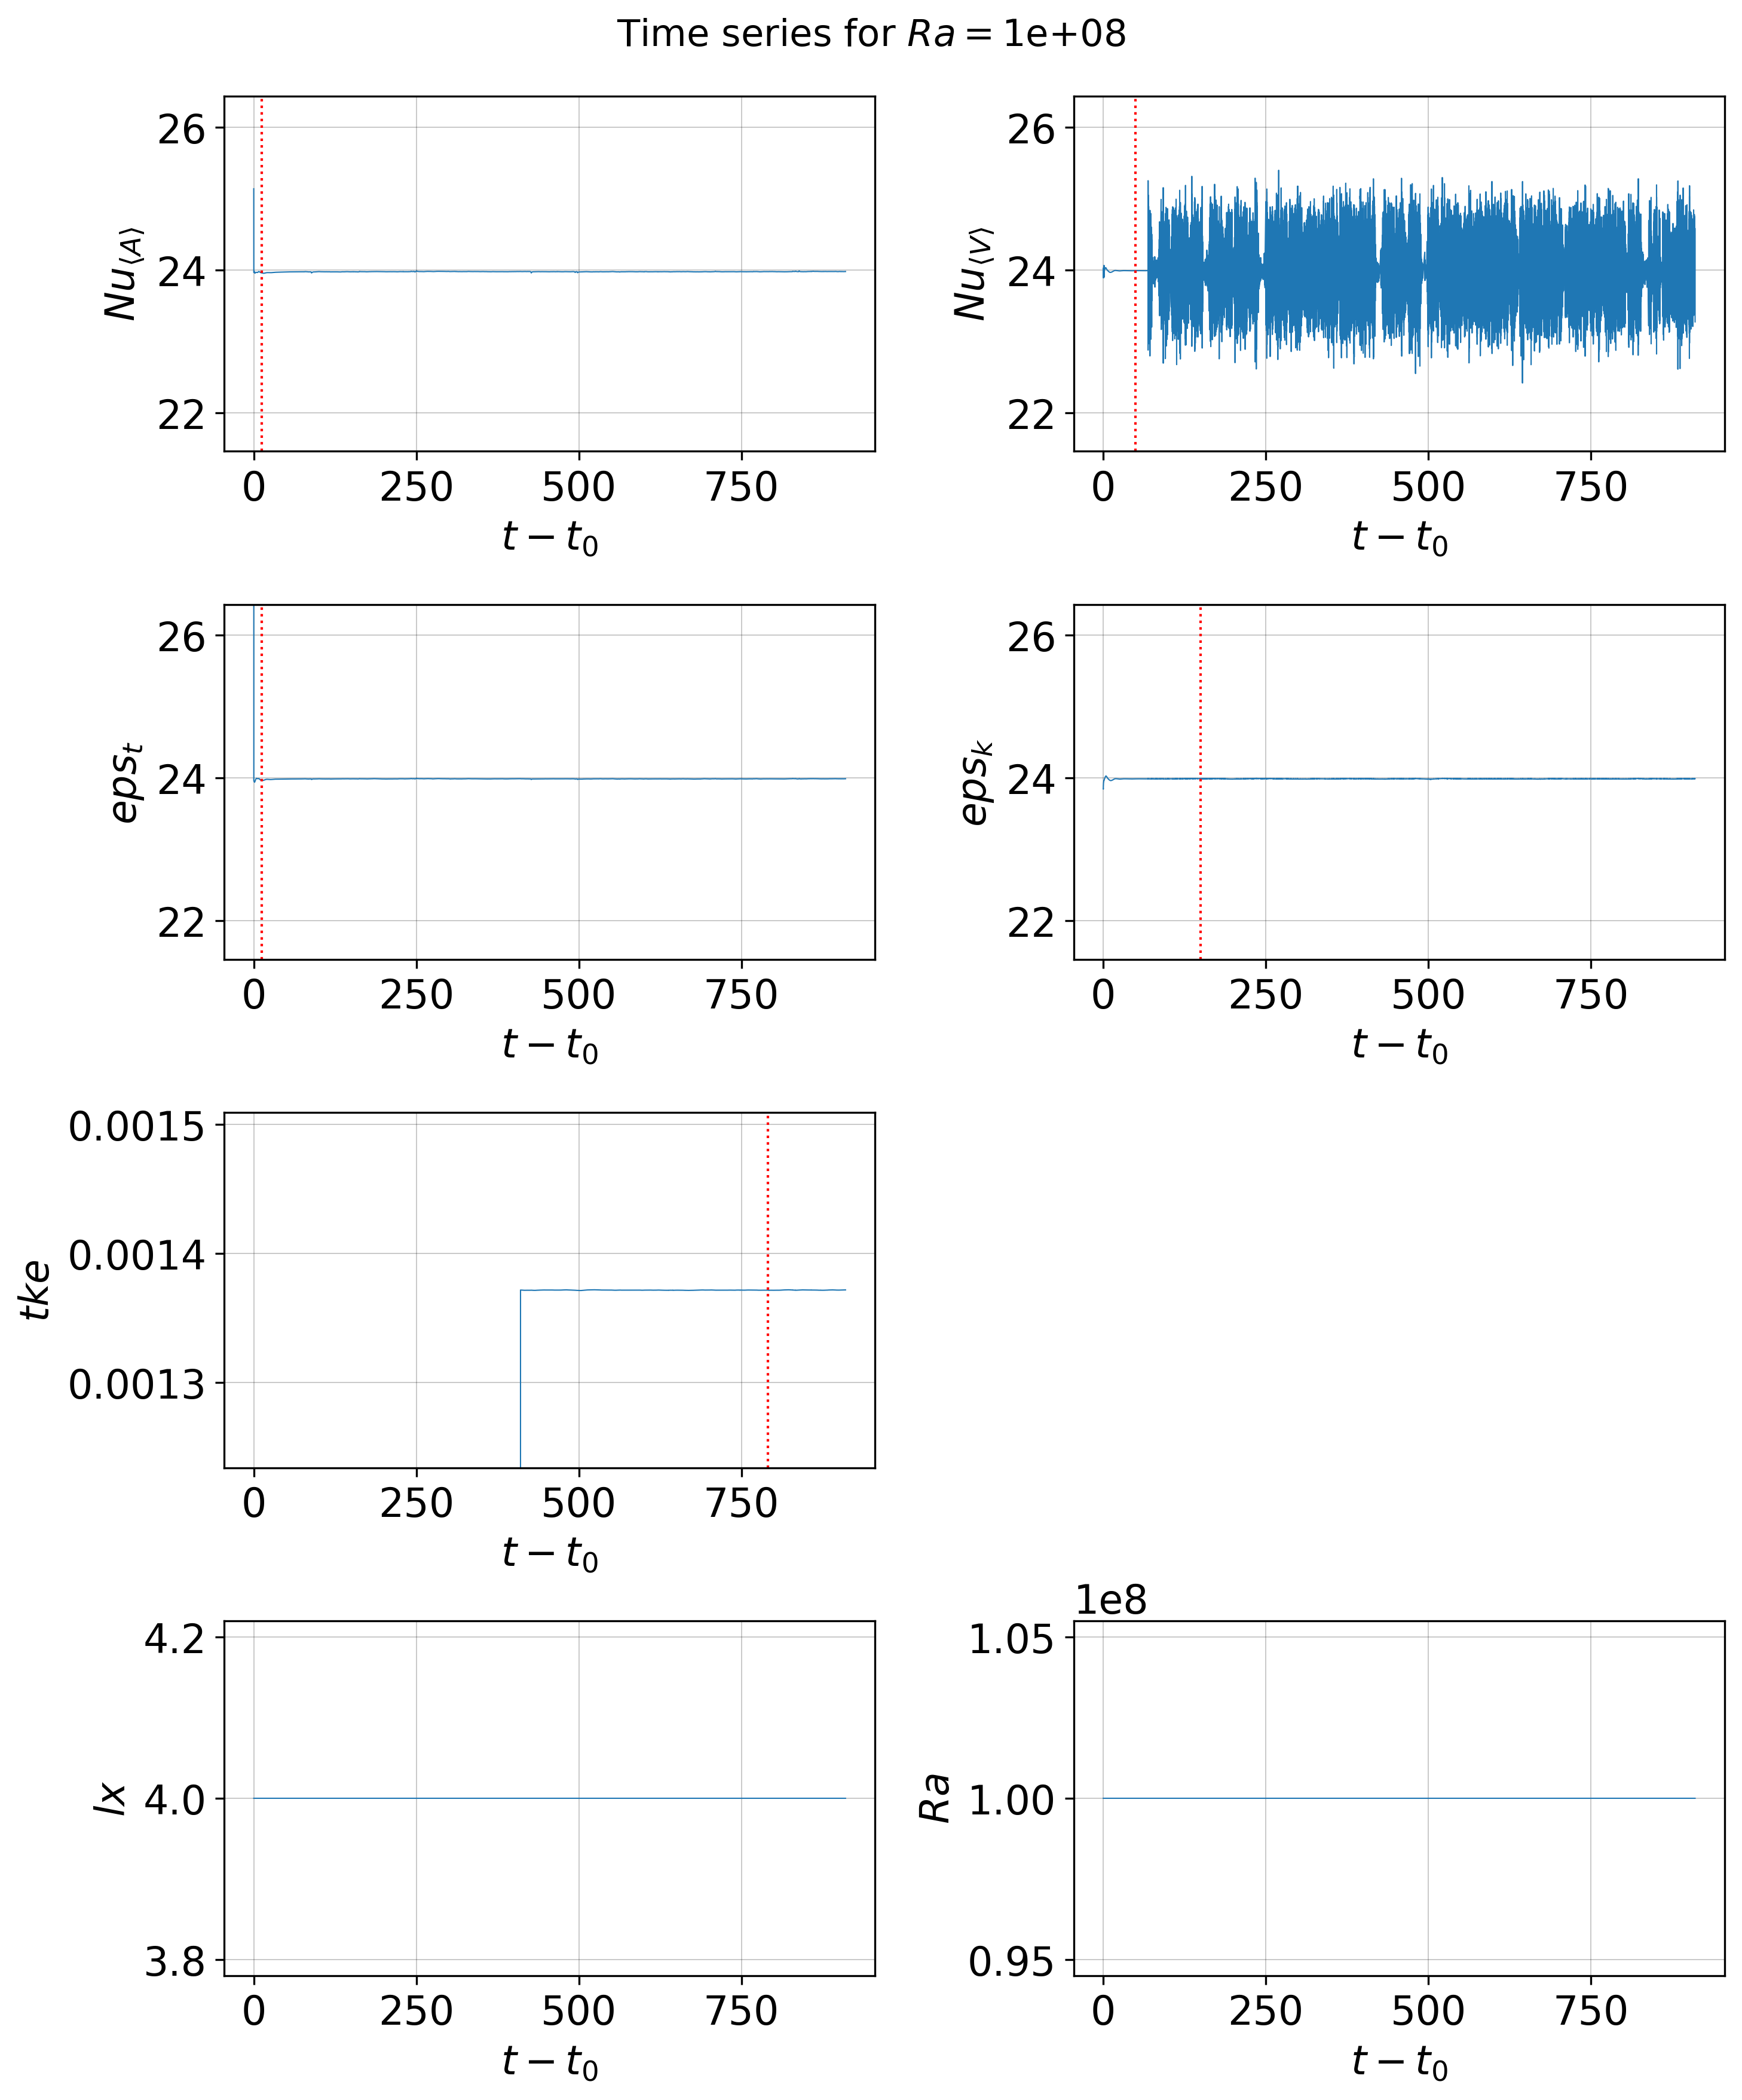

True


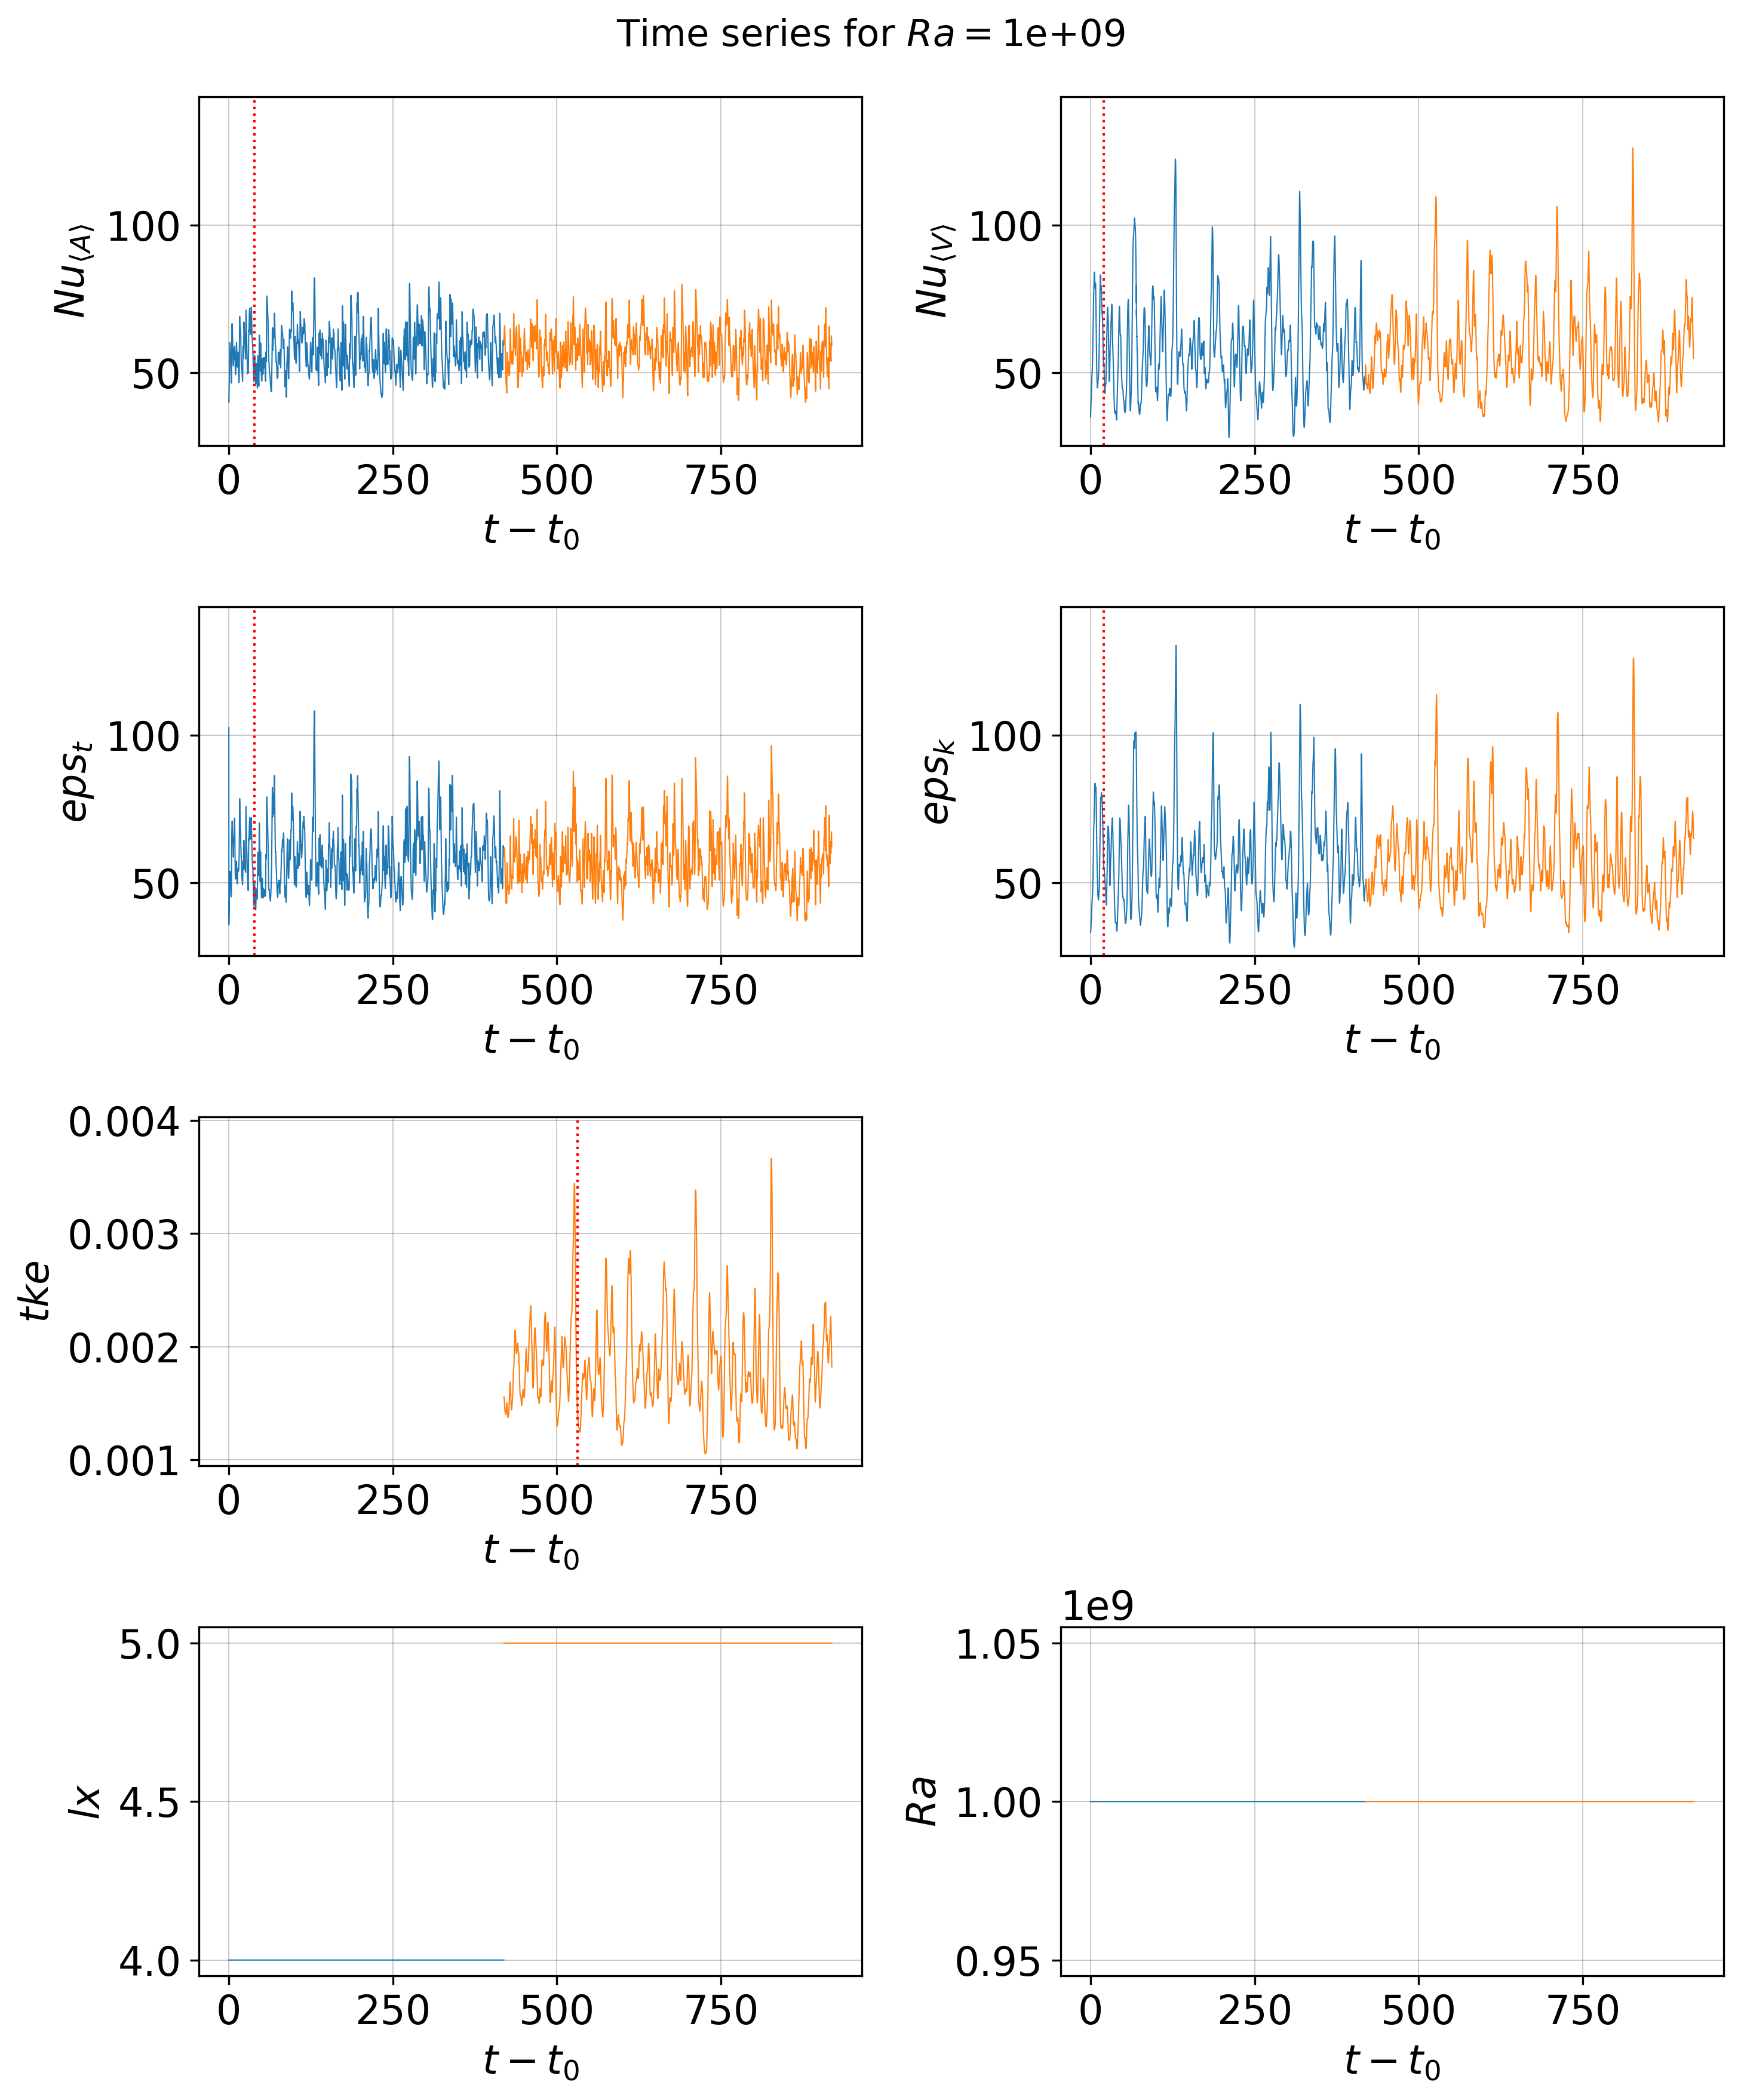

True


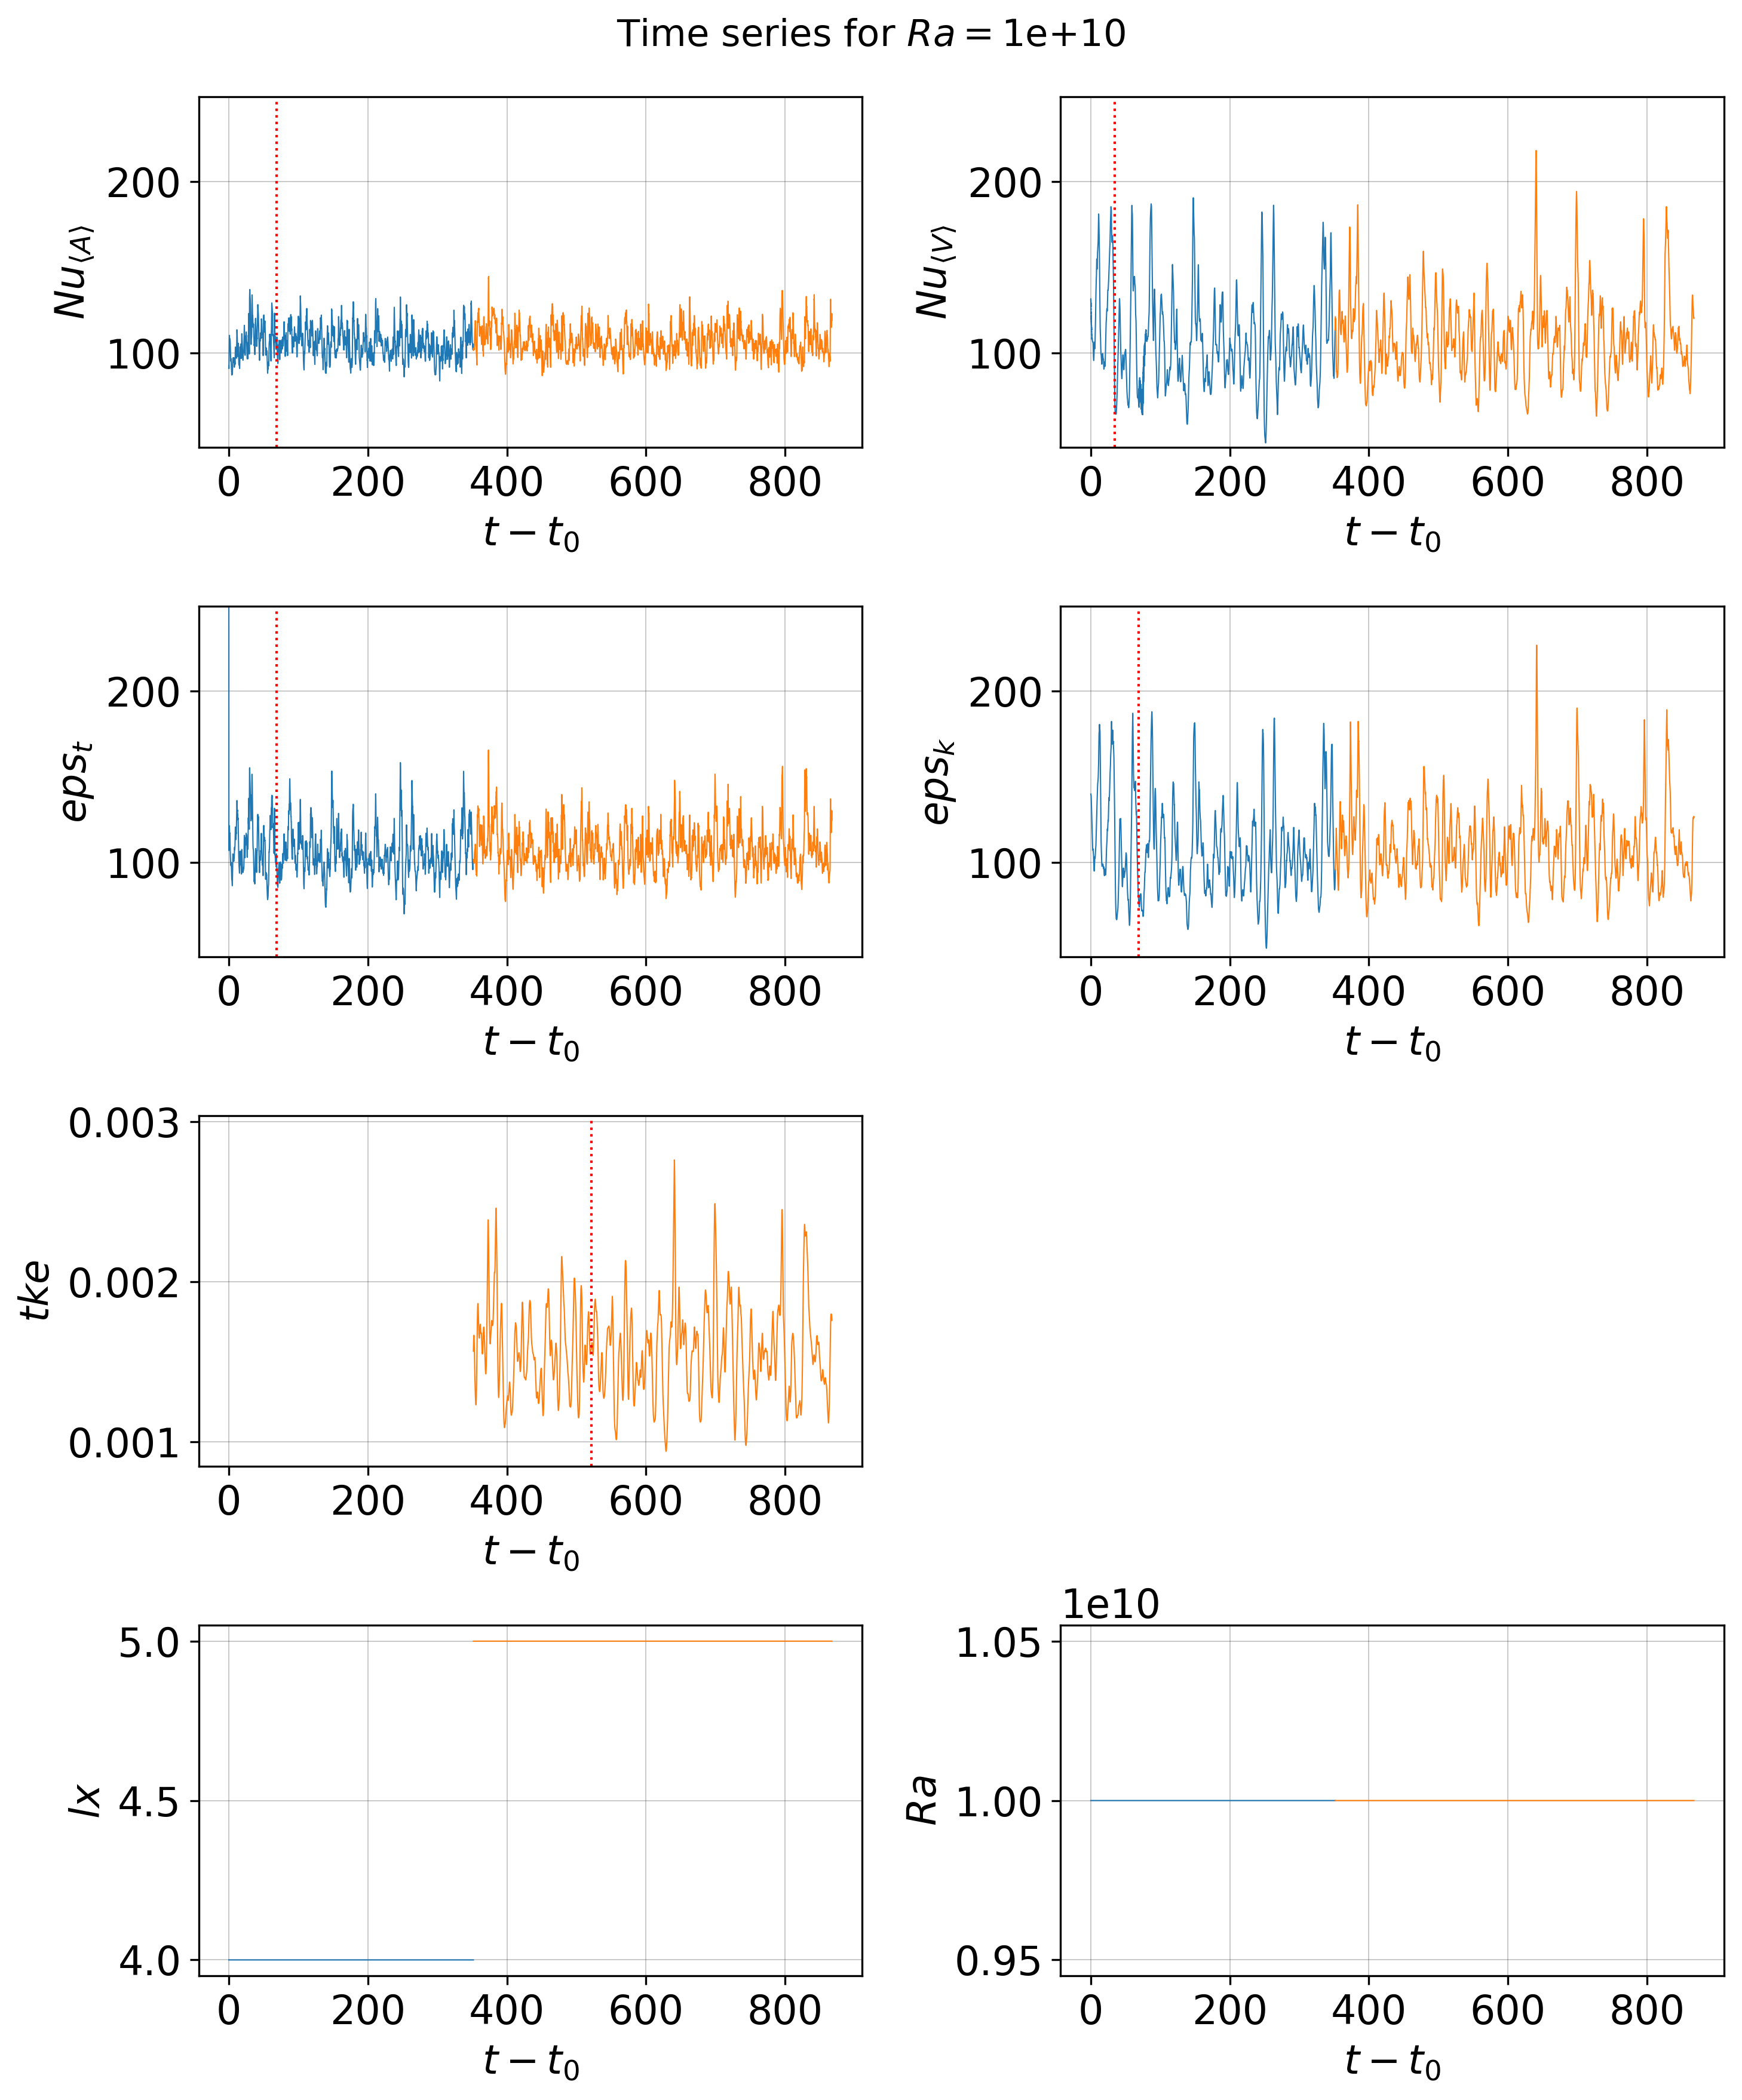

True


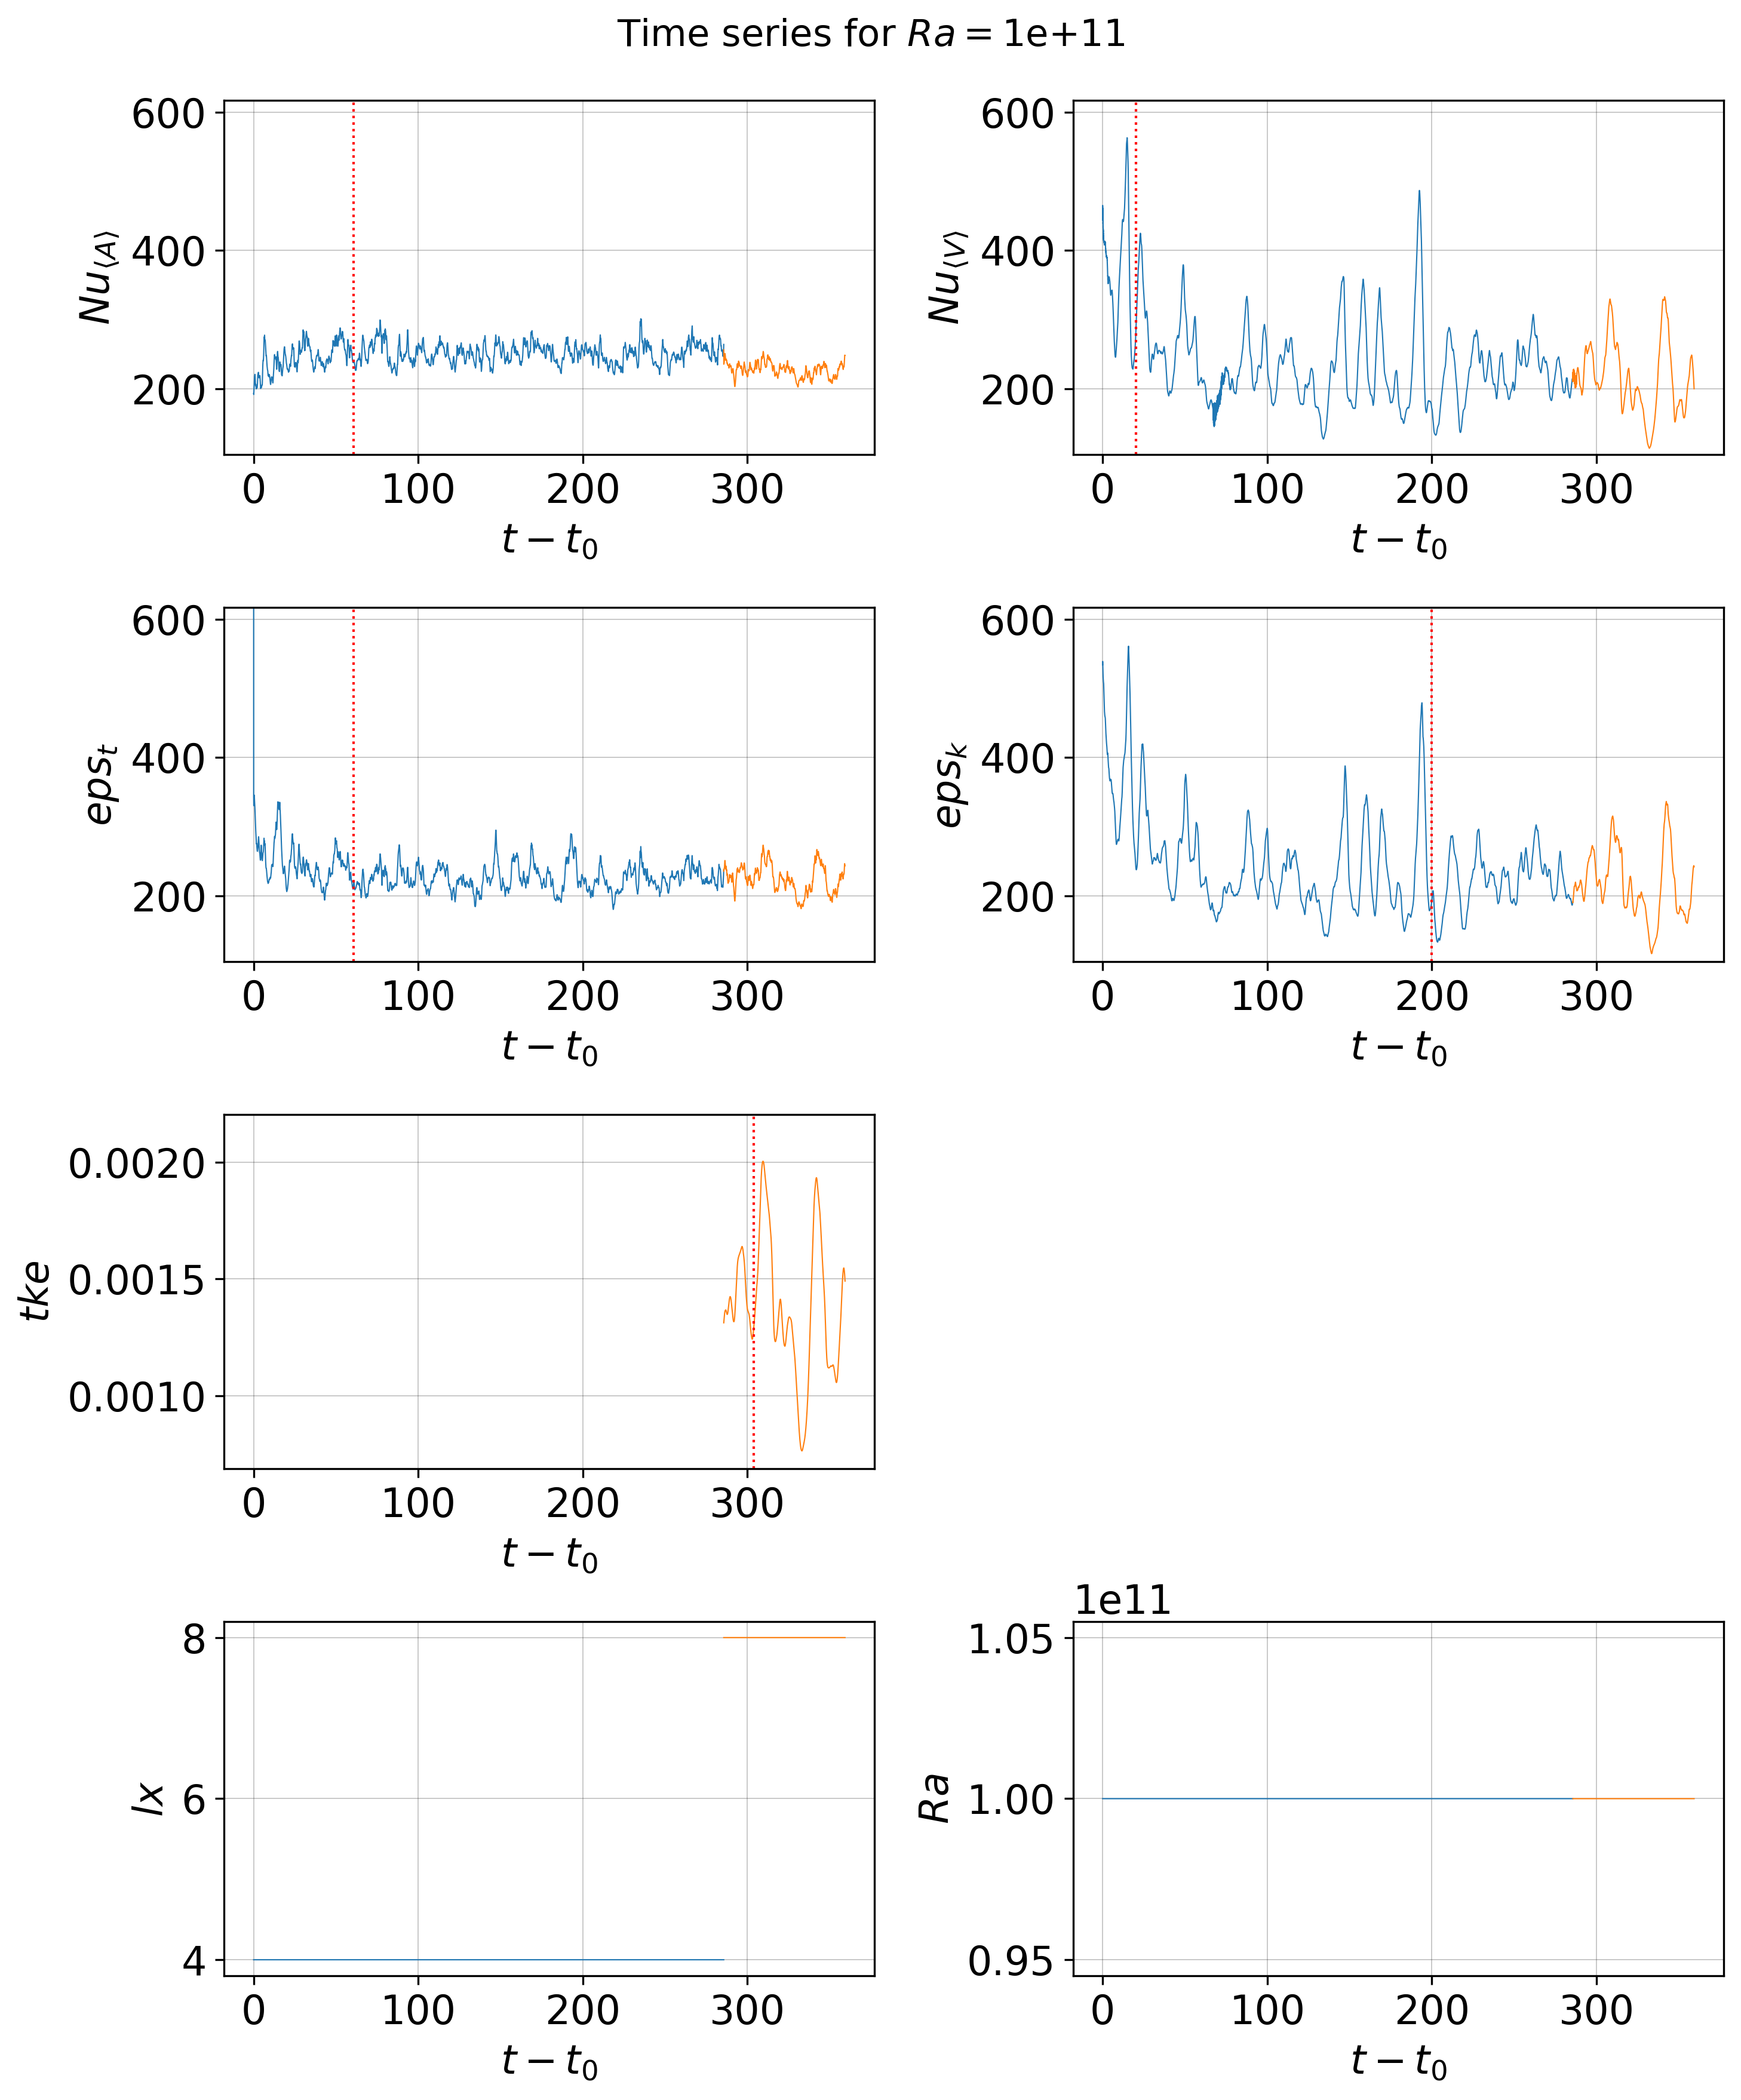

True


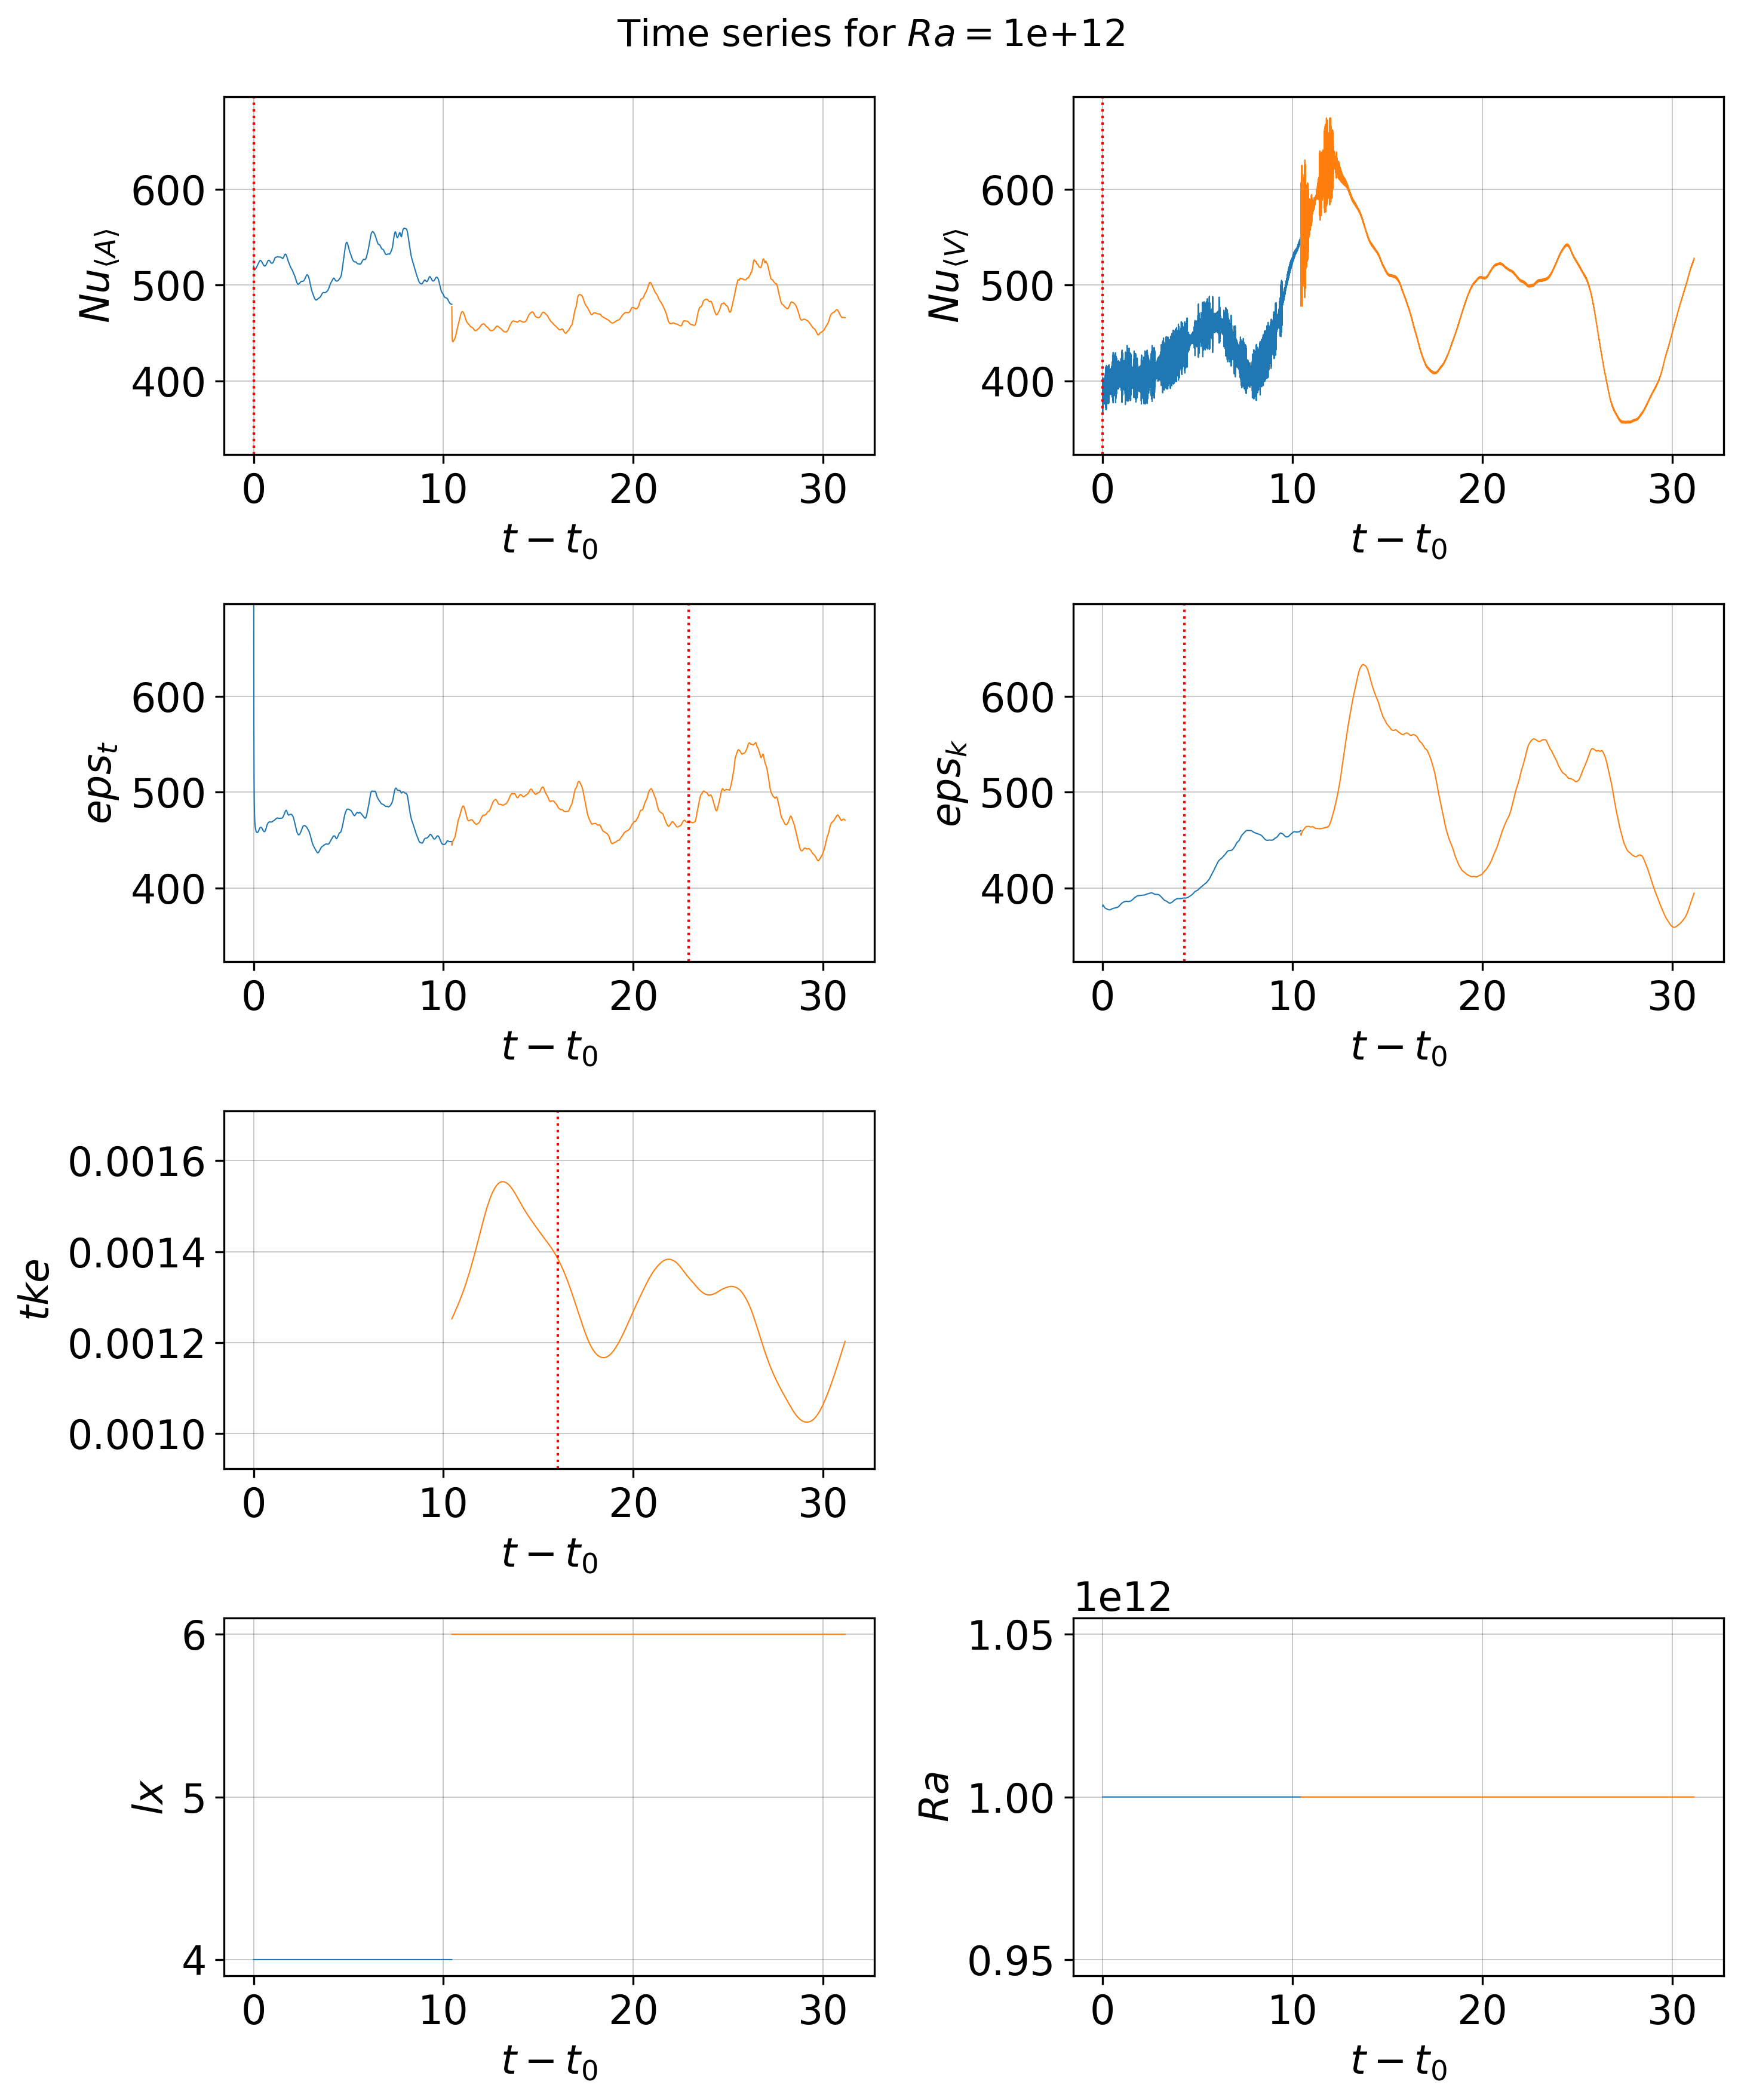

True


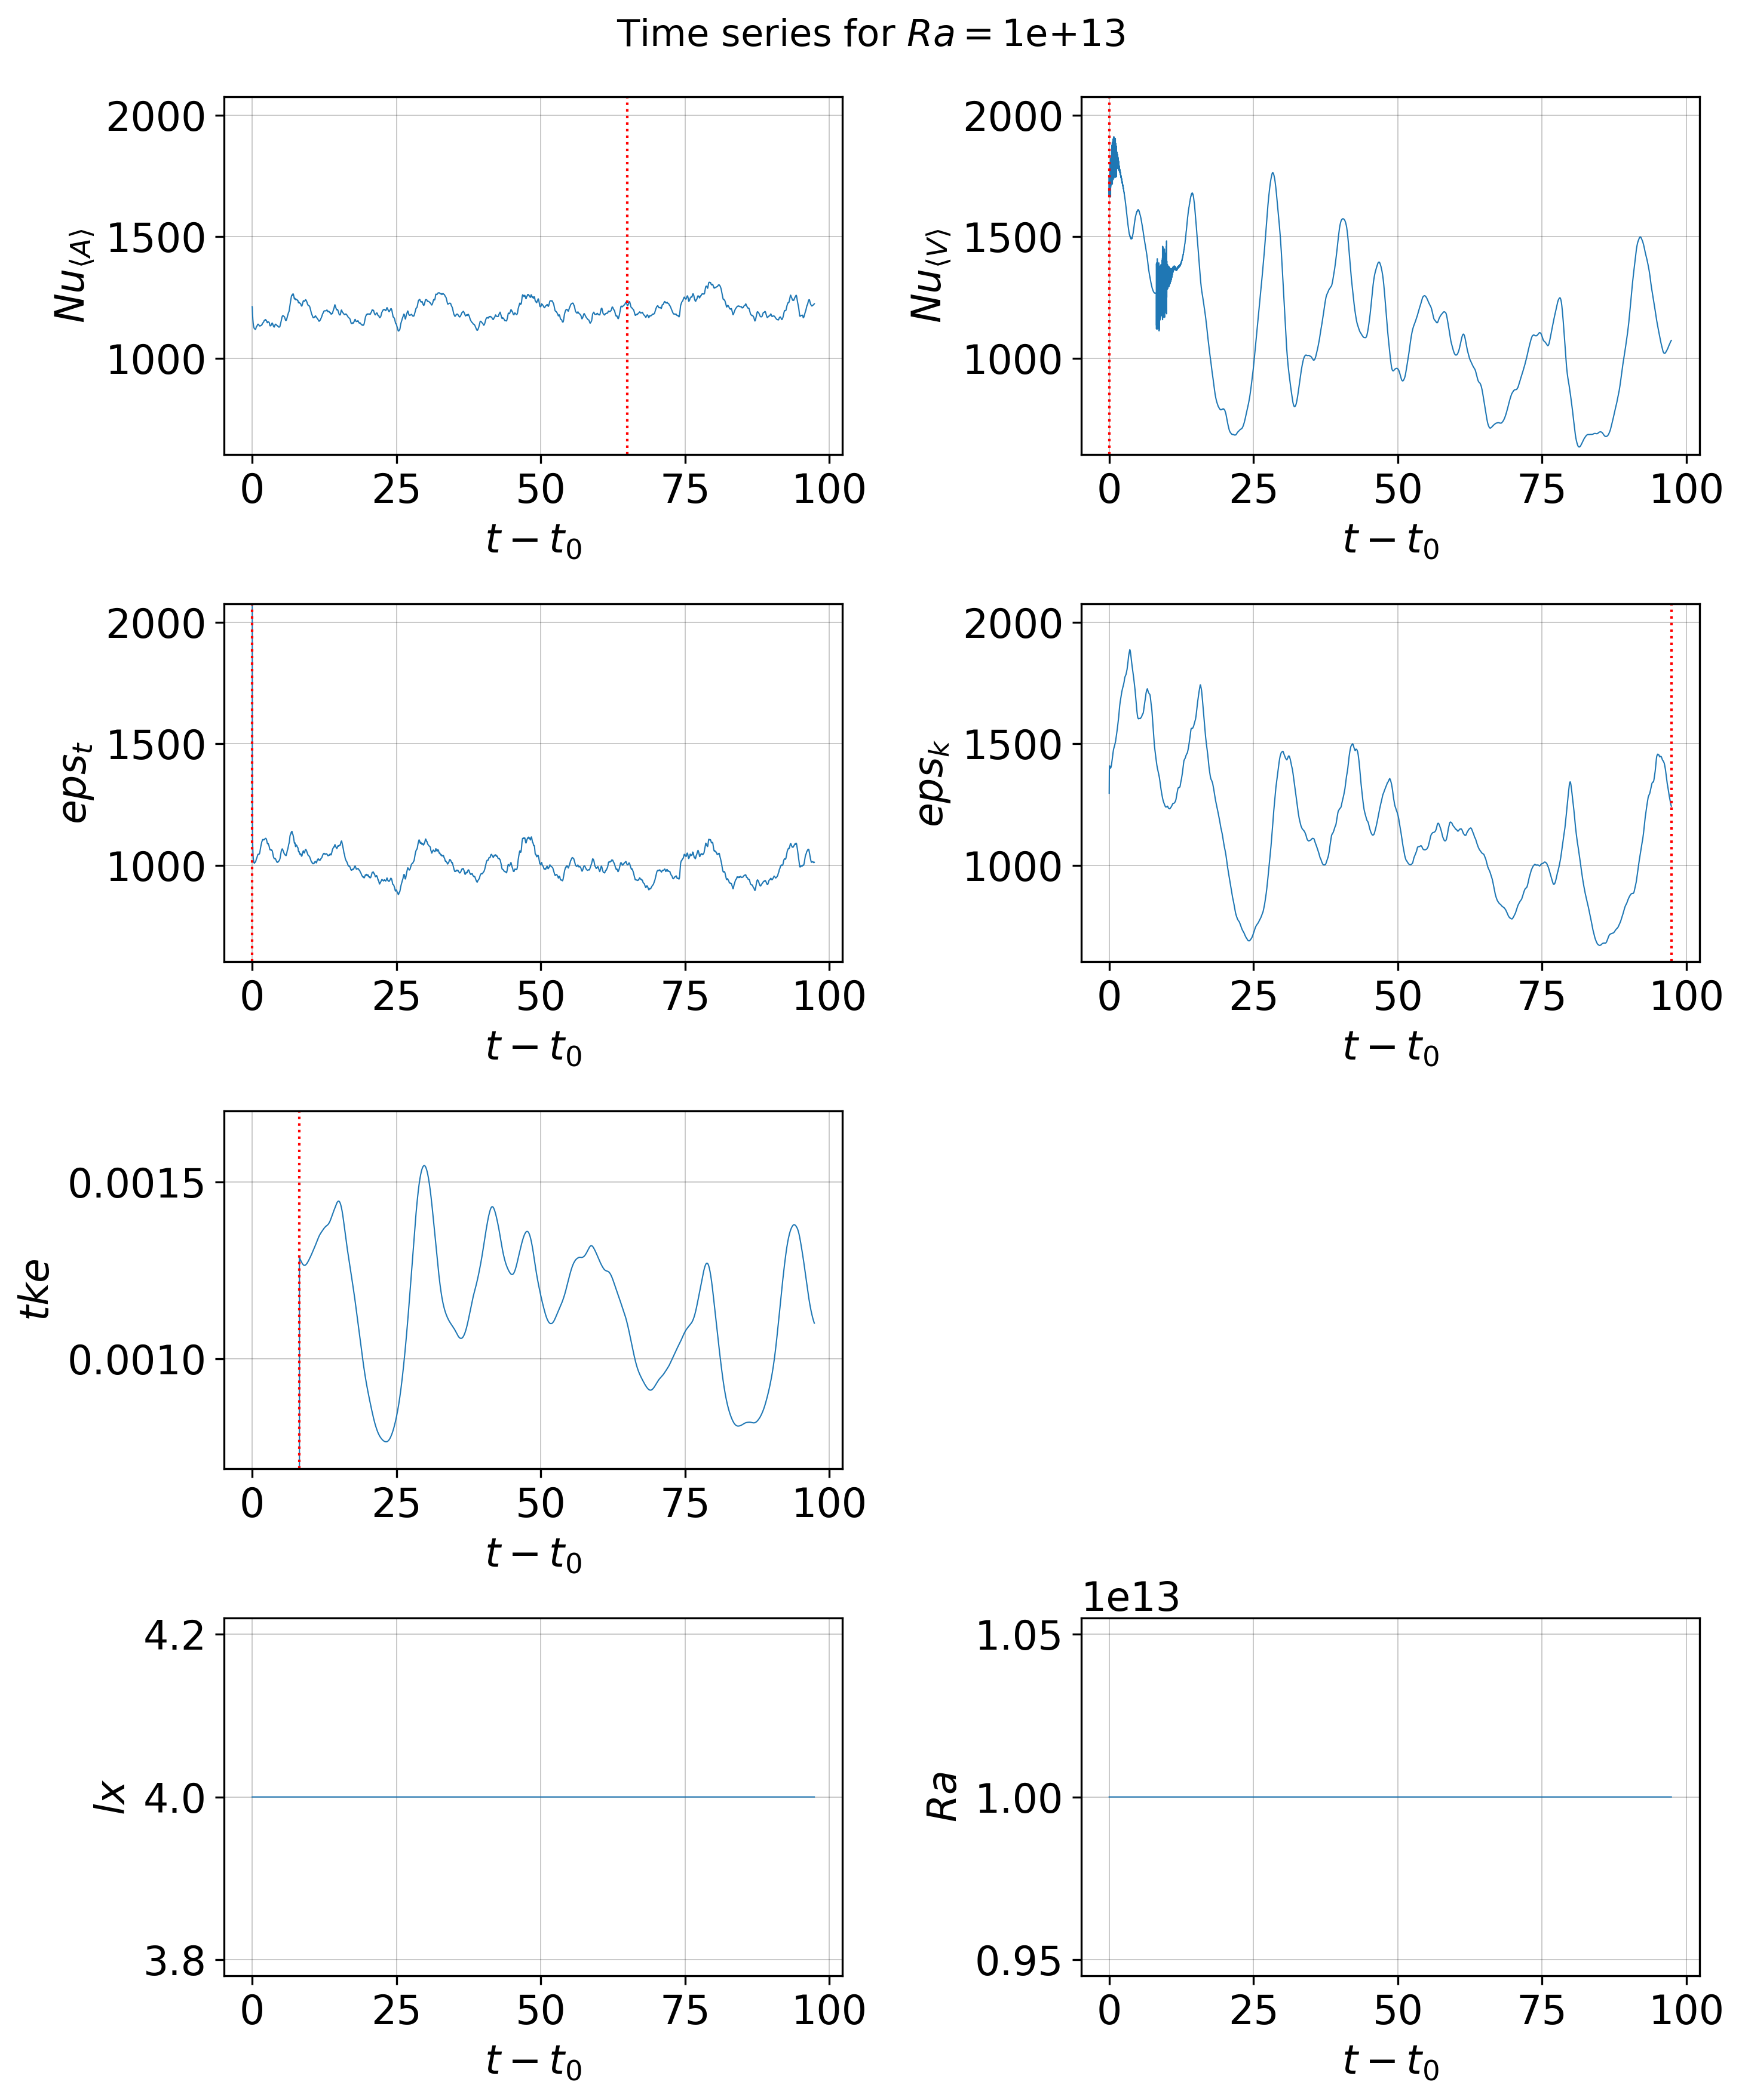

True


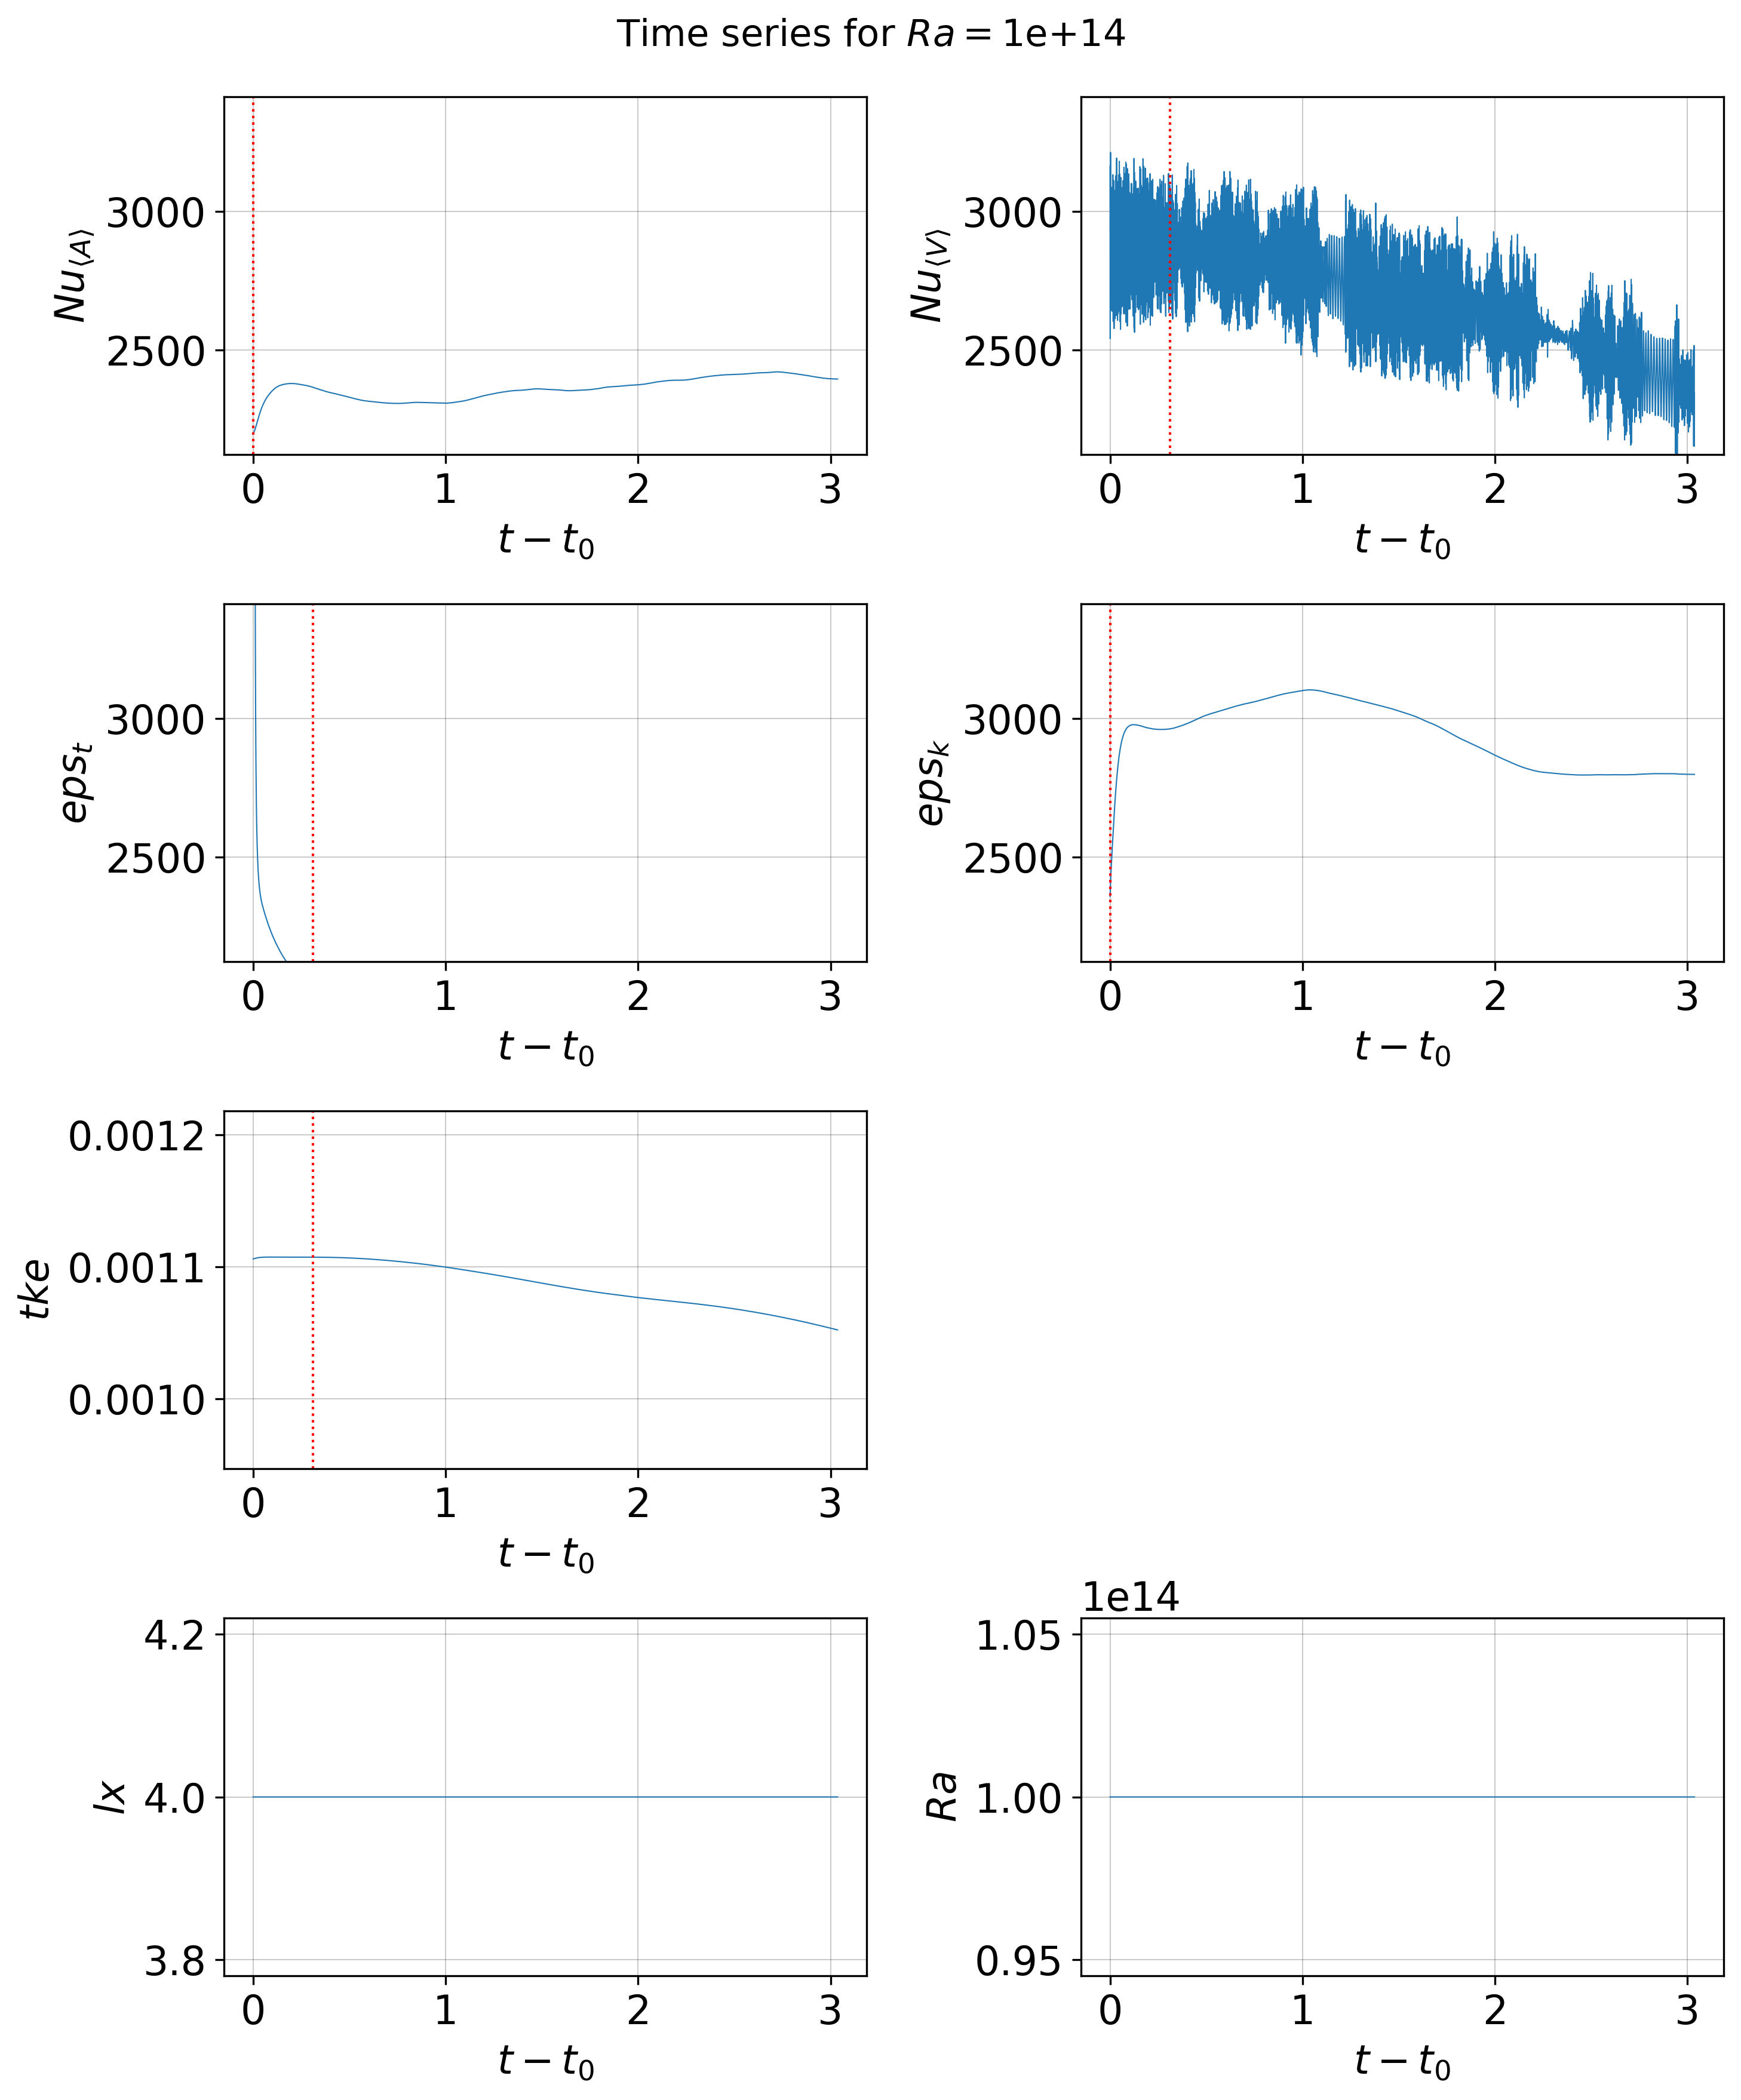

True


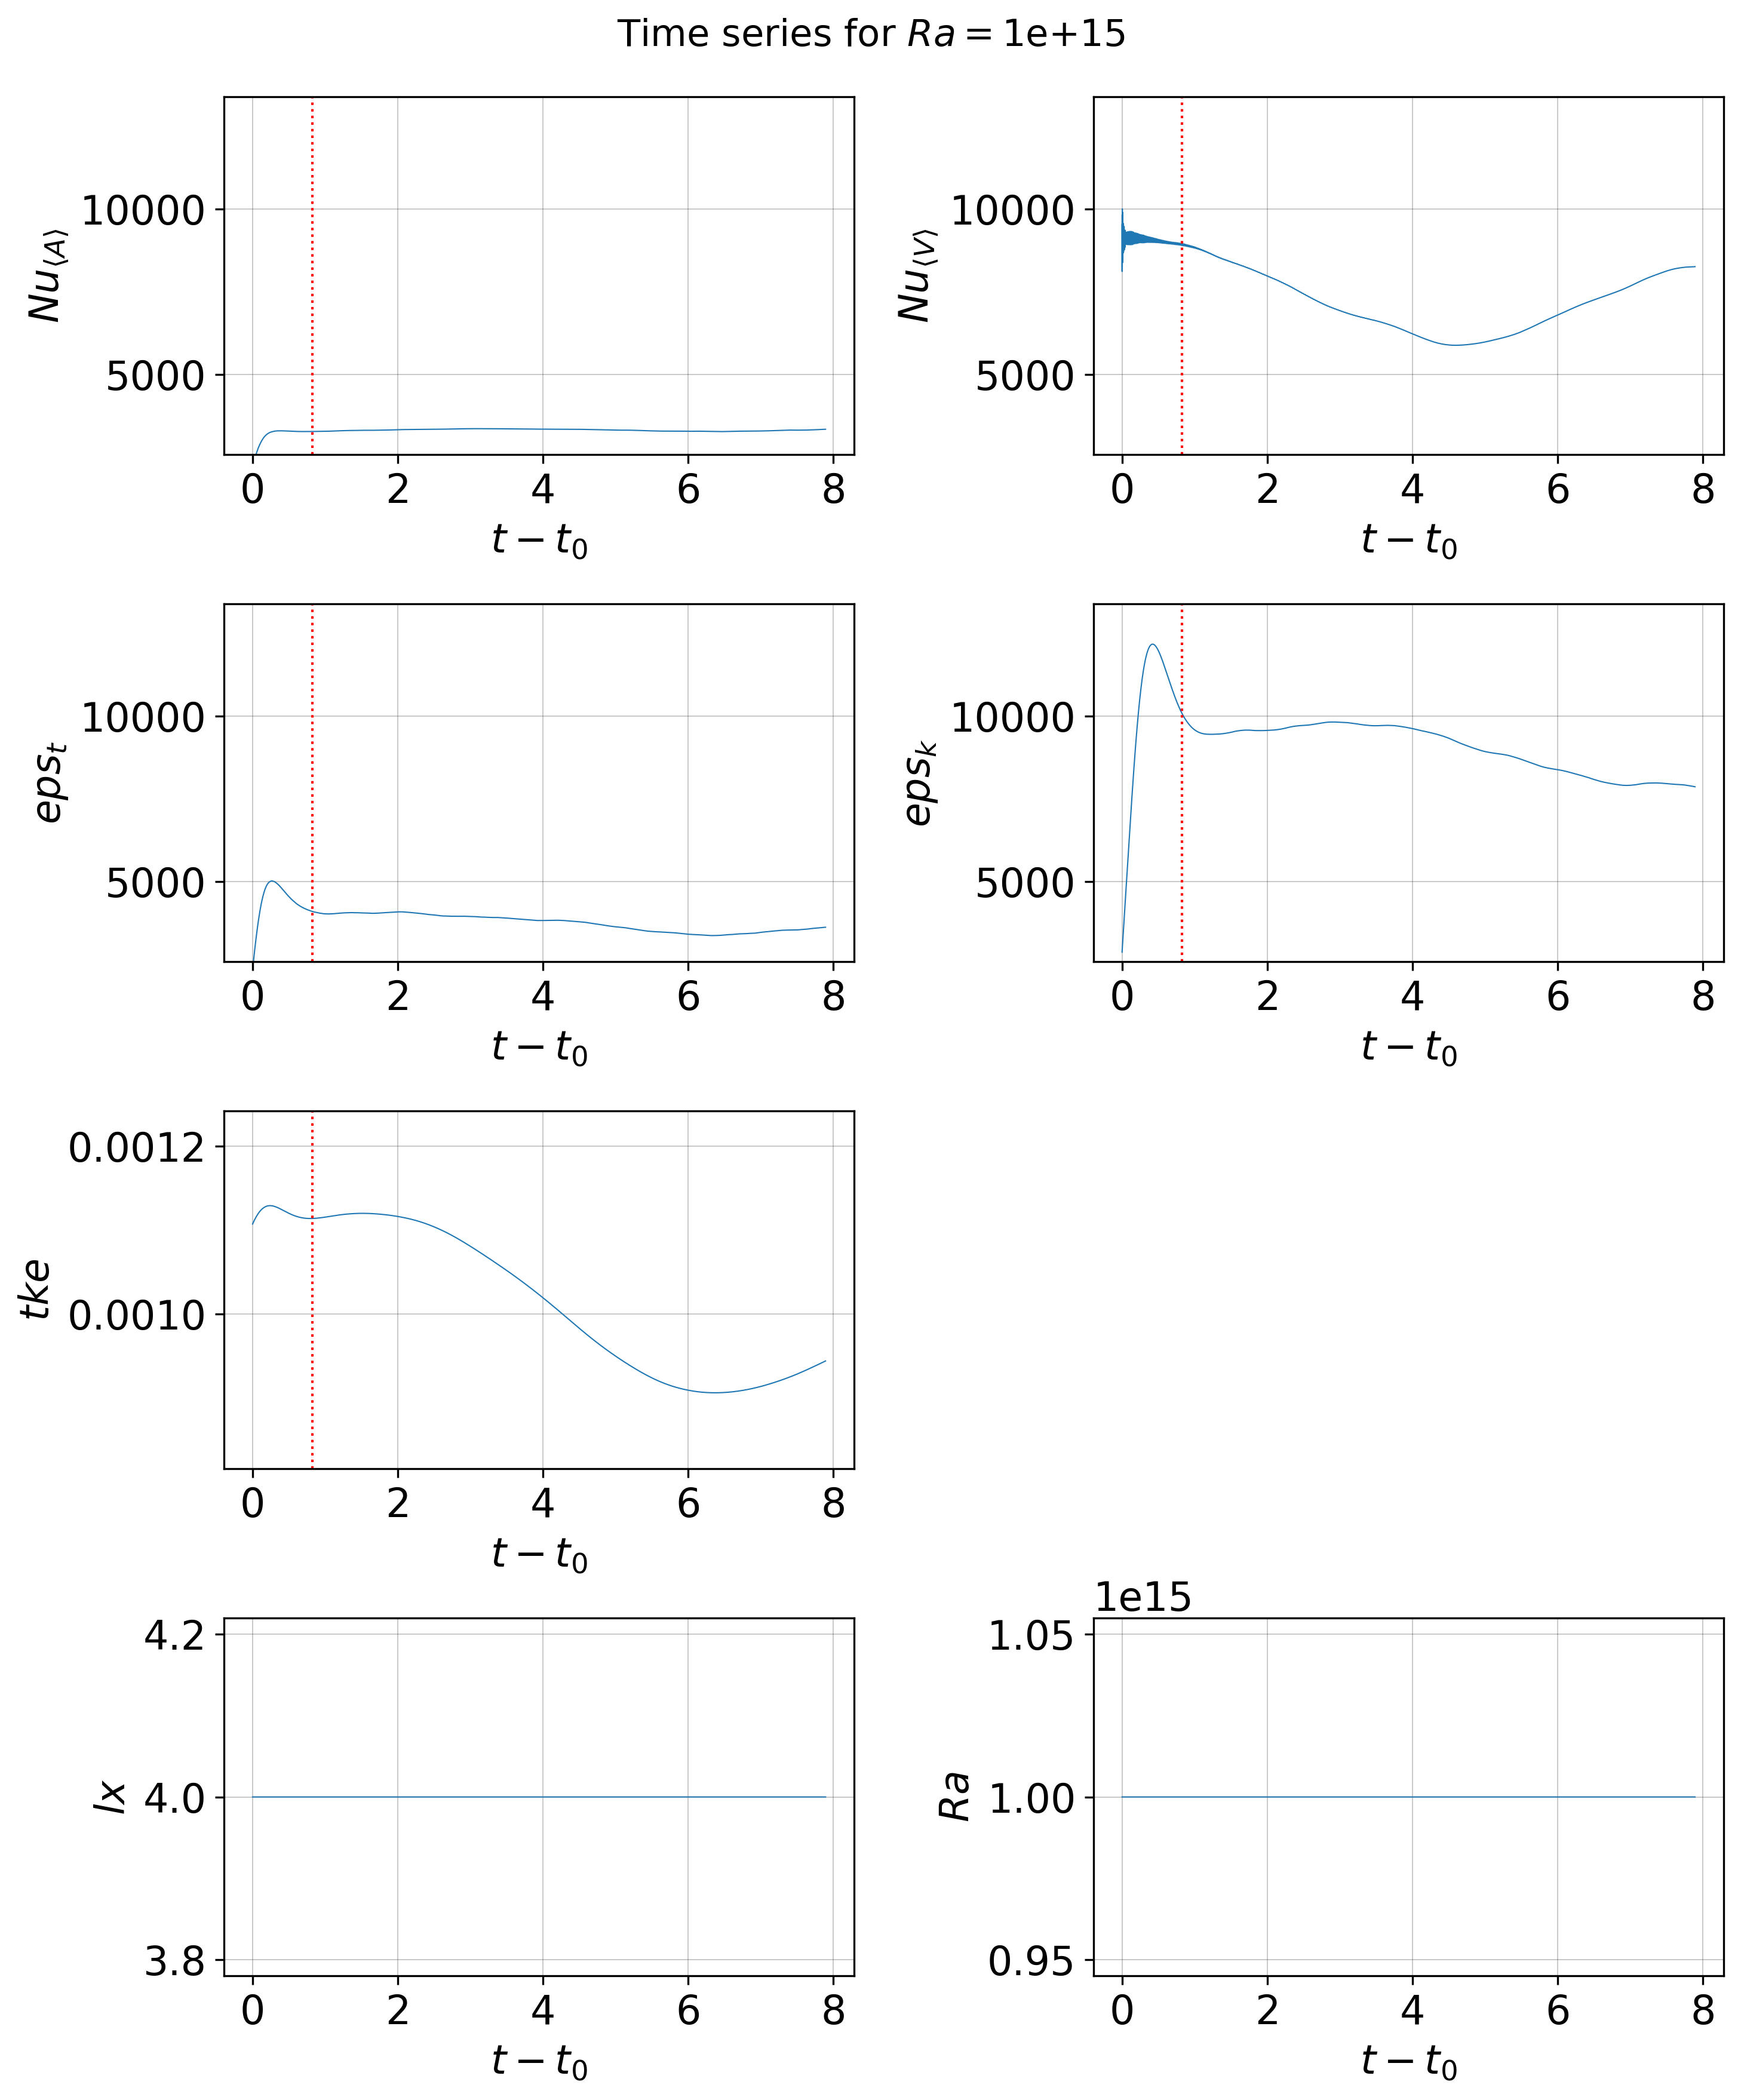

In [6]:
ts_plt.plot_ra_separate(ts_dict, check_these_rayleigh, plot_transient_end=1)

# Average the time series

## Find the optimal batch sizes

Ideally we want to have batches that are not autocorrelated among them. So we split our signal into "independent" batches.

In [7]:
for which_ra in check_these_rayleigh:
    
    print("------ Now calculating for Ra = "+repr(which_ra)+ "---------------")

    for ts in ts_dict[which_ra]:   
        # Get uncorrelated batch size
        ts.get_uncorrelated_batch(0)

------ Now calculating for Ra = 100000000.0---------------
74042
[ 5000 10000 15000 20000 25000 30000 35000 40000 45000 50000 55000 60000
 65000 70000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 18.80it/s]


[5]
111059
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 11.98it/s]


[5]
111059
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 11.87it/s]


[5]
49364
[ 5000 10000 15000 20000 25000 30000 35000 40000 45000]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 28.82it/s]


[2]
------ Now calculating for Ra = 1000000000.0---------------
176676
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:04<00:00,  7.40it/s]


[ 2  5  9 12 14]
157046
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:03<00:00,  8.22it/s]


[ 2  4  8 12]
157046
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:03<00:00,  8.31it/s]


[ 1  5  7 12]
176676
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:04<00:00,  7.47it/s]


[ 1  5  7  9 14]
------ Now calculating for Ra = 10000000000.0---------------
309224
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000 180000 185000 190000 195000 200000
 205000 210000 215000 220000 225000 230000 235000 240000 245000 250000
 255000 260000 265000 270000 275000 280000 285000 290000 295000 300000
 305000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 61/61 [00:14<00:00,  4.28it/s]


[ 6  8 10 14 16 19 21 26 28]
274866
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000 180000 185000 190000 195000 200000
 205000 210000 215000 220000 225000 230000 235000 240000 245000 250000
 255000 260000 265000 270000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:11<00:00,  4.80it/s]


[ 2  7  9 14 20 22 25]
274866
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000 180000 185000 190000 195000 200000
 205000 210000 215000 220000 225000 230000 235000 240000 245000 250000
 255000 260000 265000 270000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:11<00:00,  4.81it/s]


[ 2  4  6 10 12 15 18 20 23 25]
274866
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000 180000 185000 190000 195000 200000
 205000 210000 215000 220000 225000 230000 235000 240000 245000 250000
 255000 260000 265000 270000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:11<00:00,  4.89it/s]


[ 2  4 10 14 17 19 23]
------ Now calculating for Ra = 100000000000.0---------------
181964
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000 180000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:05<00:00,  7.12it/s]


[ 1  3  5  7  9 11 13 16]
141528
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:03<00:00,  9.18it/s]


[1 8]
141528
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:03<00:00,  9.20it/s]


[2 4 7 9]
101092
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.81it/s]


[4 6]
------ Now calculating for Ra = 1000000000000.0---------------
48530
[ 5000 10000 15000 20000 25000 30000 35000 40000 45000]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 28.07it/s]


[]
Warning!
Could not find local minima for autocorrelation
Continuing with first batch size (10)
48530
[ 5000 10000 15000 20000 25000 30000 35000 40000 45000]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 28.59it/s]


[1]
14559
[ 5000 10000]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 107.92it/s]


[]
Warning!
Could not find local minima for autocorrelation
Continuing with first batch size (10)
43677
[ 5000 10000 15000 20000 25000 30000 35000 40000]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.73it/s]


[]
Warning!
Could not find local minima for autocorrelation
Continuing with first batch size (10)
------ Now calculating for Ra = 10000000000000.0---------------
75132
[ 5000 10000 15000 20000 25000 30000 35000 40000 45000 50000 55000 60000
 65000 70000 75000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 17.45it/s]


[4]
22541
[ 5000 10000 15000 20000]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 56.79it/s]


[]
Warning!
Could not find local minima for autocorrelation
Continuing with first batch size (10)
75132
[ 5000 10000 15000 20000 25000 30000 35000 40000 45000 50000 55000 60000
 65000 70000 75000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 17.28it/s]


[2 4]
2
[]
Short time signal, modifying test batch sizes
the lenght of the signal is shorter than the minimun selected batch size
setting the optimal batch size to be half the length of the signal
------ Now calculating for Ra = 100000000000000.0---------------
6495
[5000]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 214.88it/s]


[]
Warning!
Could not find local minima for autocorrelation
Continuing with first batch size (10)
7216
[5000]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 211.56it/s]

[]
Warning!
Could not find local minima for autocorrelation


Continuing with first batch size (10)
6495
[5000]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 214.40it/s]

[]
Warning!
Could not find local minima for autocorrelation


Continuing with first batch size (10)
7216
[5000]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 211.17it/s]

[]
Warning!
Could not find local minima for autocorrelation


Continuing with first batch size (10)
------ Now calculating for Ra = 1000000000000000.0---------------
21057
[ 5000 10000 15000 20000]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 57.68it/s]

[]
Warning!
Could not find local minima for autocorrelation


Continuing with first batch size (10)
21057
[ 5000 10000 15000 20000]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 58.05it/s]

[]
Warning!
Could not find local minima for autocorrelation


Continuing with first batch size (10)
21057
[ 5000 10000 15000 20000]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 57.94it/s]

[]
Warning!
Could not find local minima for autocorrelation


Continuing with first batch size (10)
21057
[ 5000 10000 15000 20000]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 56.96it/s]

[]
Warning!
Could not find local minima for autocorrelation


Continuing with first batch size (10)


## Apply the NOBM to calculate the averages

In [9]:
for which_ra in check_these_rayleigh:

    print("------ Now calculating for Ra = "+repr(which_ra)+ "---------------")

    for ts in ts_dict[which_ra]:   
        # Get uncorrelated batch size
        ts.get_stats()

------ Now calculating for Ra = 100000000.0---------------
------ Now calculating for Ra = 1000000000.0---------------
------ Now calculating for Ra = 10000000000.0---------------
------ Now calculating for Ra = 100000000000.0---------------
------ Now calculating for Ra = 1000000000000.0---------------
------ Now calculating for Ra = 10000000000000.0---------------
------ Now calculating for Ra = 100000000000000.0---------------
------ Now calculating for Ra = 1000000000000000.0---------------


In [10]:
for which_ra in check_these_rayleigh:
    
    for ts in ts_dict[which_ra]:

        ra_string = '{:.0e}'.format(ts.Ra[-1])

        df = pd.DataFrame({
        "Ra="+ra_string : [""],
        "Nu": [""],
        "var": [""],
        "95% CI": [""]
        })

        new_row = {"Ra="+ra_string: "Nu_A", "Nu": ts.stats_nu_a[0], "var": ts.stats_nu_a[1], "95% CI": ts.stats_nu_a[2]}
        df.loc[0] = new_row

        new_row = {"Ra="+ra_string: "Nu_V", "Nu": ts.stats_nu_v[0], "var": ts.stats_nu_v[1], "95% CI": ts.stats_nu_v[2]}
        df.loc[1] = new_row

        new_row = {"Ra="+ra_string: "Nu_eps_t", "Nu": ts.stats_nu_eps_t[0], "var": ts.stats_nu_eps_t[1], "95% CI": ts.stats_nu_eps_t[2]}
        df.loc[2] = new_row

        new_row = {"Ra="+ra_string: "Nu_eps_k", "Nu": ts.stats_nu_eps_k[0], "var": ts.stats_nu_eps_k[1], "95% CI": ts.stats_nu_eps_k[2]}
        df.loc[3] = new_row
        
        display(df)

Ra=1e+08         Nu       var    95% CI
0      Nu_A  23.971017   0.00001  0.006046
1      Nu_V  23.989871  0.000002  0.002731
2  Nu_eps_t  23.986373  0.000005  0.004174
3  Nu_eps_k  23.989415       0.0  0.000457

Ra=1e+09         Nu       var    95% CI
0      Nu_A  56.849321  0.310879  1.092828
1      Nu_V  57.397094  2.286341  2.963648
2  Nu_eps_t  57.181859  0.337356  1.138415
3  Nu_eps_k  57.295327  1.141985  2.094528

Ra=1e+10          Nu       var    95% CI
0      Nu_A  106.667522  0.223958  0.927555
1      Nu_V  106.807719  0.813894  1.768235
2  Nu_eps_t  107.321977  0.423521  1.275539
3  Nu_eps_k  107.256203  1.232338   2.17581

Ra=1e+11          Nu        var     95% CI
0      Nu_A  238.103574  11.005616   6.502244
1      Nu_V  231.336697  76.888235  17.186444
2  Nu_eps_t  225.044531   7.183054   5.253039
3  Nu_eps_k  217.584008  35.985435  11.757621

Ra=1e+12          Nu         var     95% CI
0      Nu_A  484.144531   128.60947  22.227599
1      Nu_V  476.222476  419.490547  40.143678
2  Nu_eps_t  487.914541   14.318825   7.416684
3  Nu_eps_k  483.426282  355.748308  36.968131

Ra=1e+13           Nu          var      95% CI
0      Nu_A  1213.612173   133.731533   22.665901
1      Nu_V  1164.163772  8223.678711  177.741622
2  Nu_eps_t  1011.998059   196.408093   27.468552
3  Nu_eps_k  1243.083217     0.001167     0.06697

Ra=1e+14           Nu  var 95% CI
0      Nu_A  2361.869684  0.0    0.0
1      Nu_V  2655.962173  0.0    0.0
2  Nu_eps_t  2074.551793  0.0    0.0
3  Nu_eps_k  2939.143824  0.0    0.0

Ra=1e+15           Nu            var      95% CI
0      Nu_A  3327.589836     126.002213   22.001139
1      Nu_V  7181.948126  159960.182983  783.902442
2  Nu_eps_t  3754.431437   13827.276273  230.475301
3  Nu_eps_k   9033.83791  104512.798233  633.637409

# Draw an scaling Plot

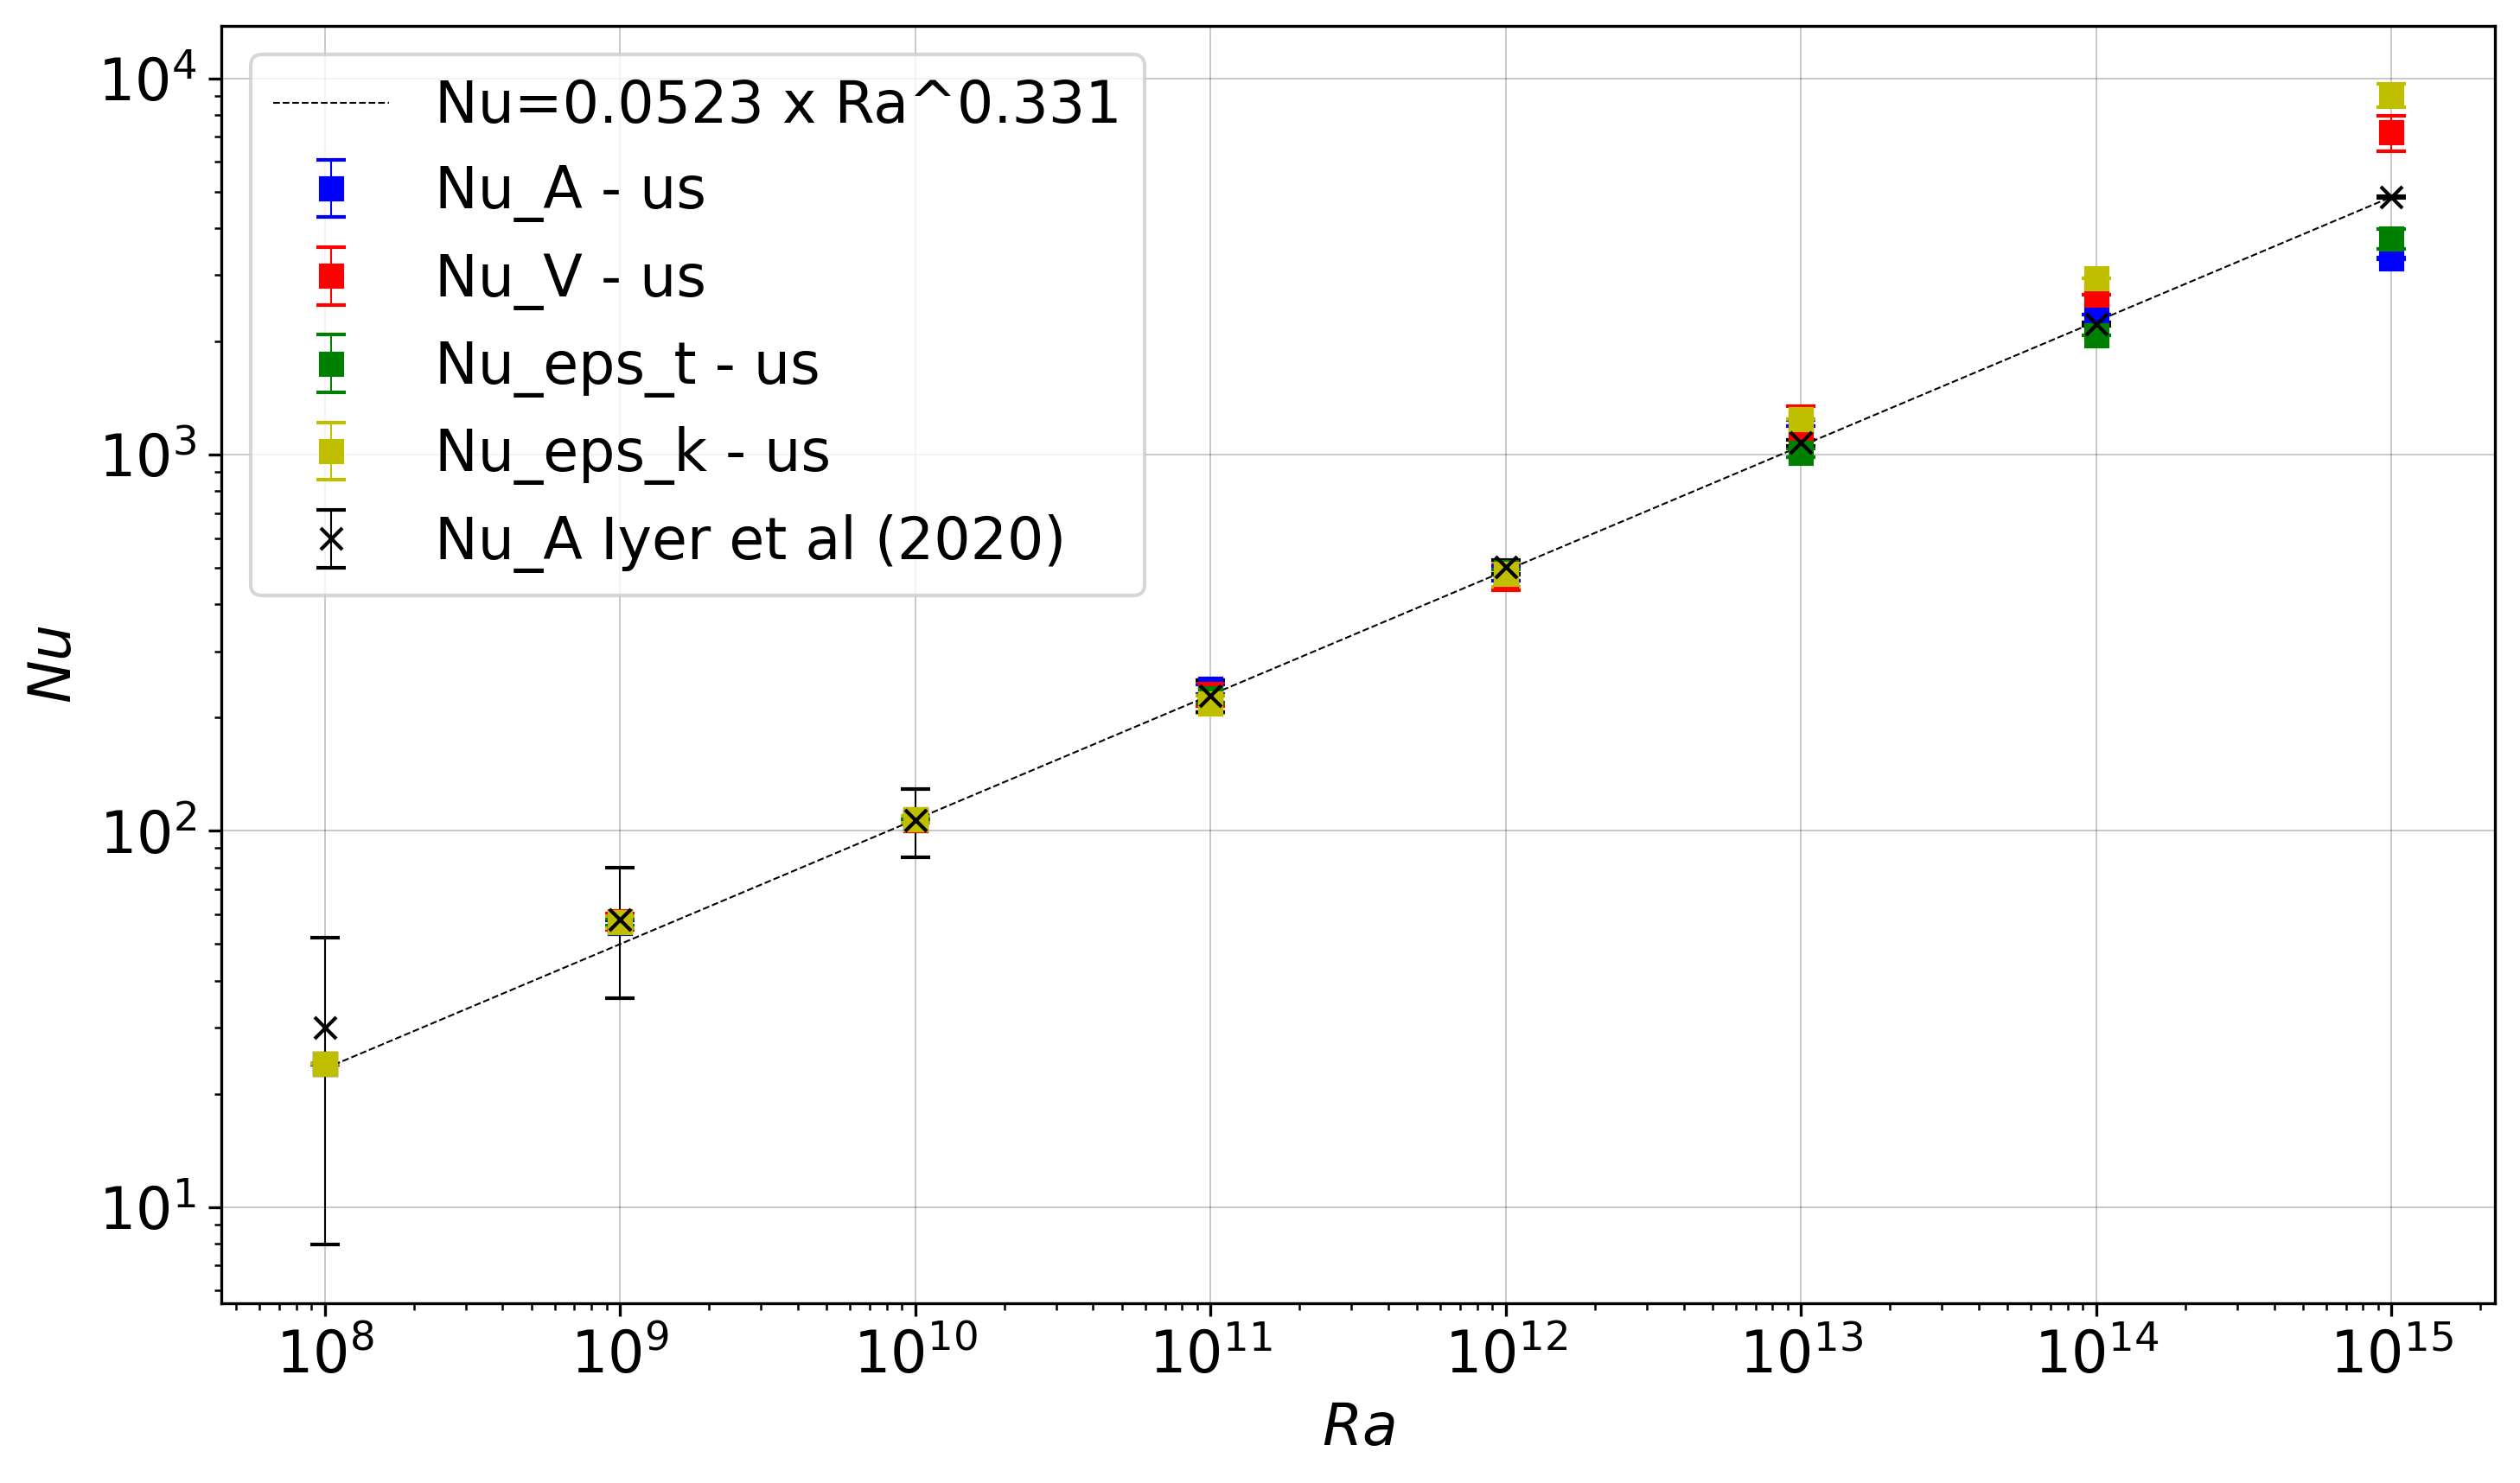

In [14]:
rcParams["errorbar.capsize"] = 4

fig, ax = plt.subplots(1, 1,figsize=(10, 6), dpi=300)

lab = 0
for which_ra in check_these_rayleigh:
    for ts in [ts_dict[which_ra][0]]:
        if ts.stats_nu_a[0] > 10:
            if lab ==0:     
                ax.errorbar(ts.Ra[0], ts.stats_nu_a[0], yerr=ts.stats_nu_a[2], fmt = 's', color = 'b', label = "Nu_A - us")
                
                ax.errorbar(ts.Ra[0], ts.stats_nu_v[0], yerr=ts.stats_nu_v[2], fmt = 's', color = 'r', label = "Nu_V - us")

                ax.errorbar(ts.Ra[0], ts.stats_nu_eps_t[0], yerr=ts.stats_nu_eps_t[2], fmt = 's', color = 'g', label = "Nu_eps_t - us")
                
                ax.errorbar(ts.Ra[0], ts.stats_nu_eps_k[0], yerr=ts.stats_nu_eps_k[2], fmt = 's', color = 'y', label = "Nu_eps_k - us")

            else:
                ax.errorbar(ts.Ra[0], ts.stats_nu_a[0], yerr=ts.stats_nu_a[2], fmt = 's', color = 'b')
                ax.errorbar(ts.Ra[0], ts.stats_nu_v[0], yerr=ts.stats_nu_v[2], fmt = 's', color = 'r')
                ax.errorbar(ts.Ra[0], ts.stats_nu_eps_t[0], yerr=ts.stats_nu_eps_t[2], fmt = 's', color = 'g')
                ax.errorbar(ts.Ra[0], ts.stats_nu_eps_k[0], yerr=ts.stats_nu_eps_k[2], fmt = 's', color = 'y')


            lab +=1

#Plot data by jorg
ra_j = [1e8,1e9,1e10,1e11, 1e12, 1e13, 1e14, 1e15]
nu_j = [29.94,58,107,229, 503, 1075, 2228, 4845]
nu_e_j = [0.04, 10, 11, 13, 25, 44, 100, 200]
ax.errorbar(ra_j, nu_j, yerr=ts.stats_nu_a[2], fmt = 'x', color = 'k' , label = "Nu_A Iyer et al (2020)")

# Plot scaling line
ra_x=np.linspace(1e8,1e15, 1000)
nu_x=0.0525*ra_x**(0.331)

ax.plot(ra_x,nu_x, "--k", label="Nu=0.0523 x Ra^0.331")

ax.set_xlabel(r'$Ra$')
ax.set_ylabel(r'$Nu$')

ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(color = 'black', linestyle = '-', linewidth = 0.1)
plt.tight_layout()
plt.legend()
#plt.savefig("nu_timeseries.pdf", format="pdf", bbox_inches="tight")
plt.show()

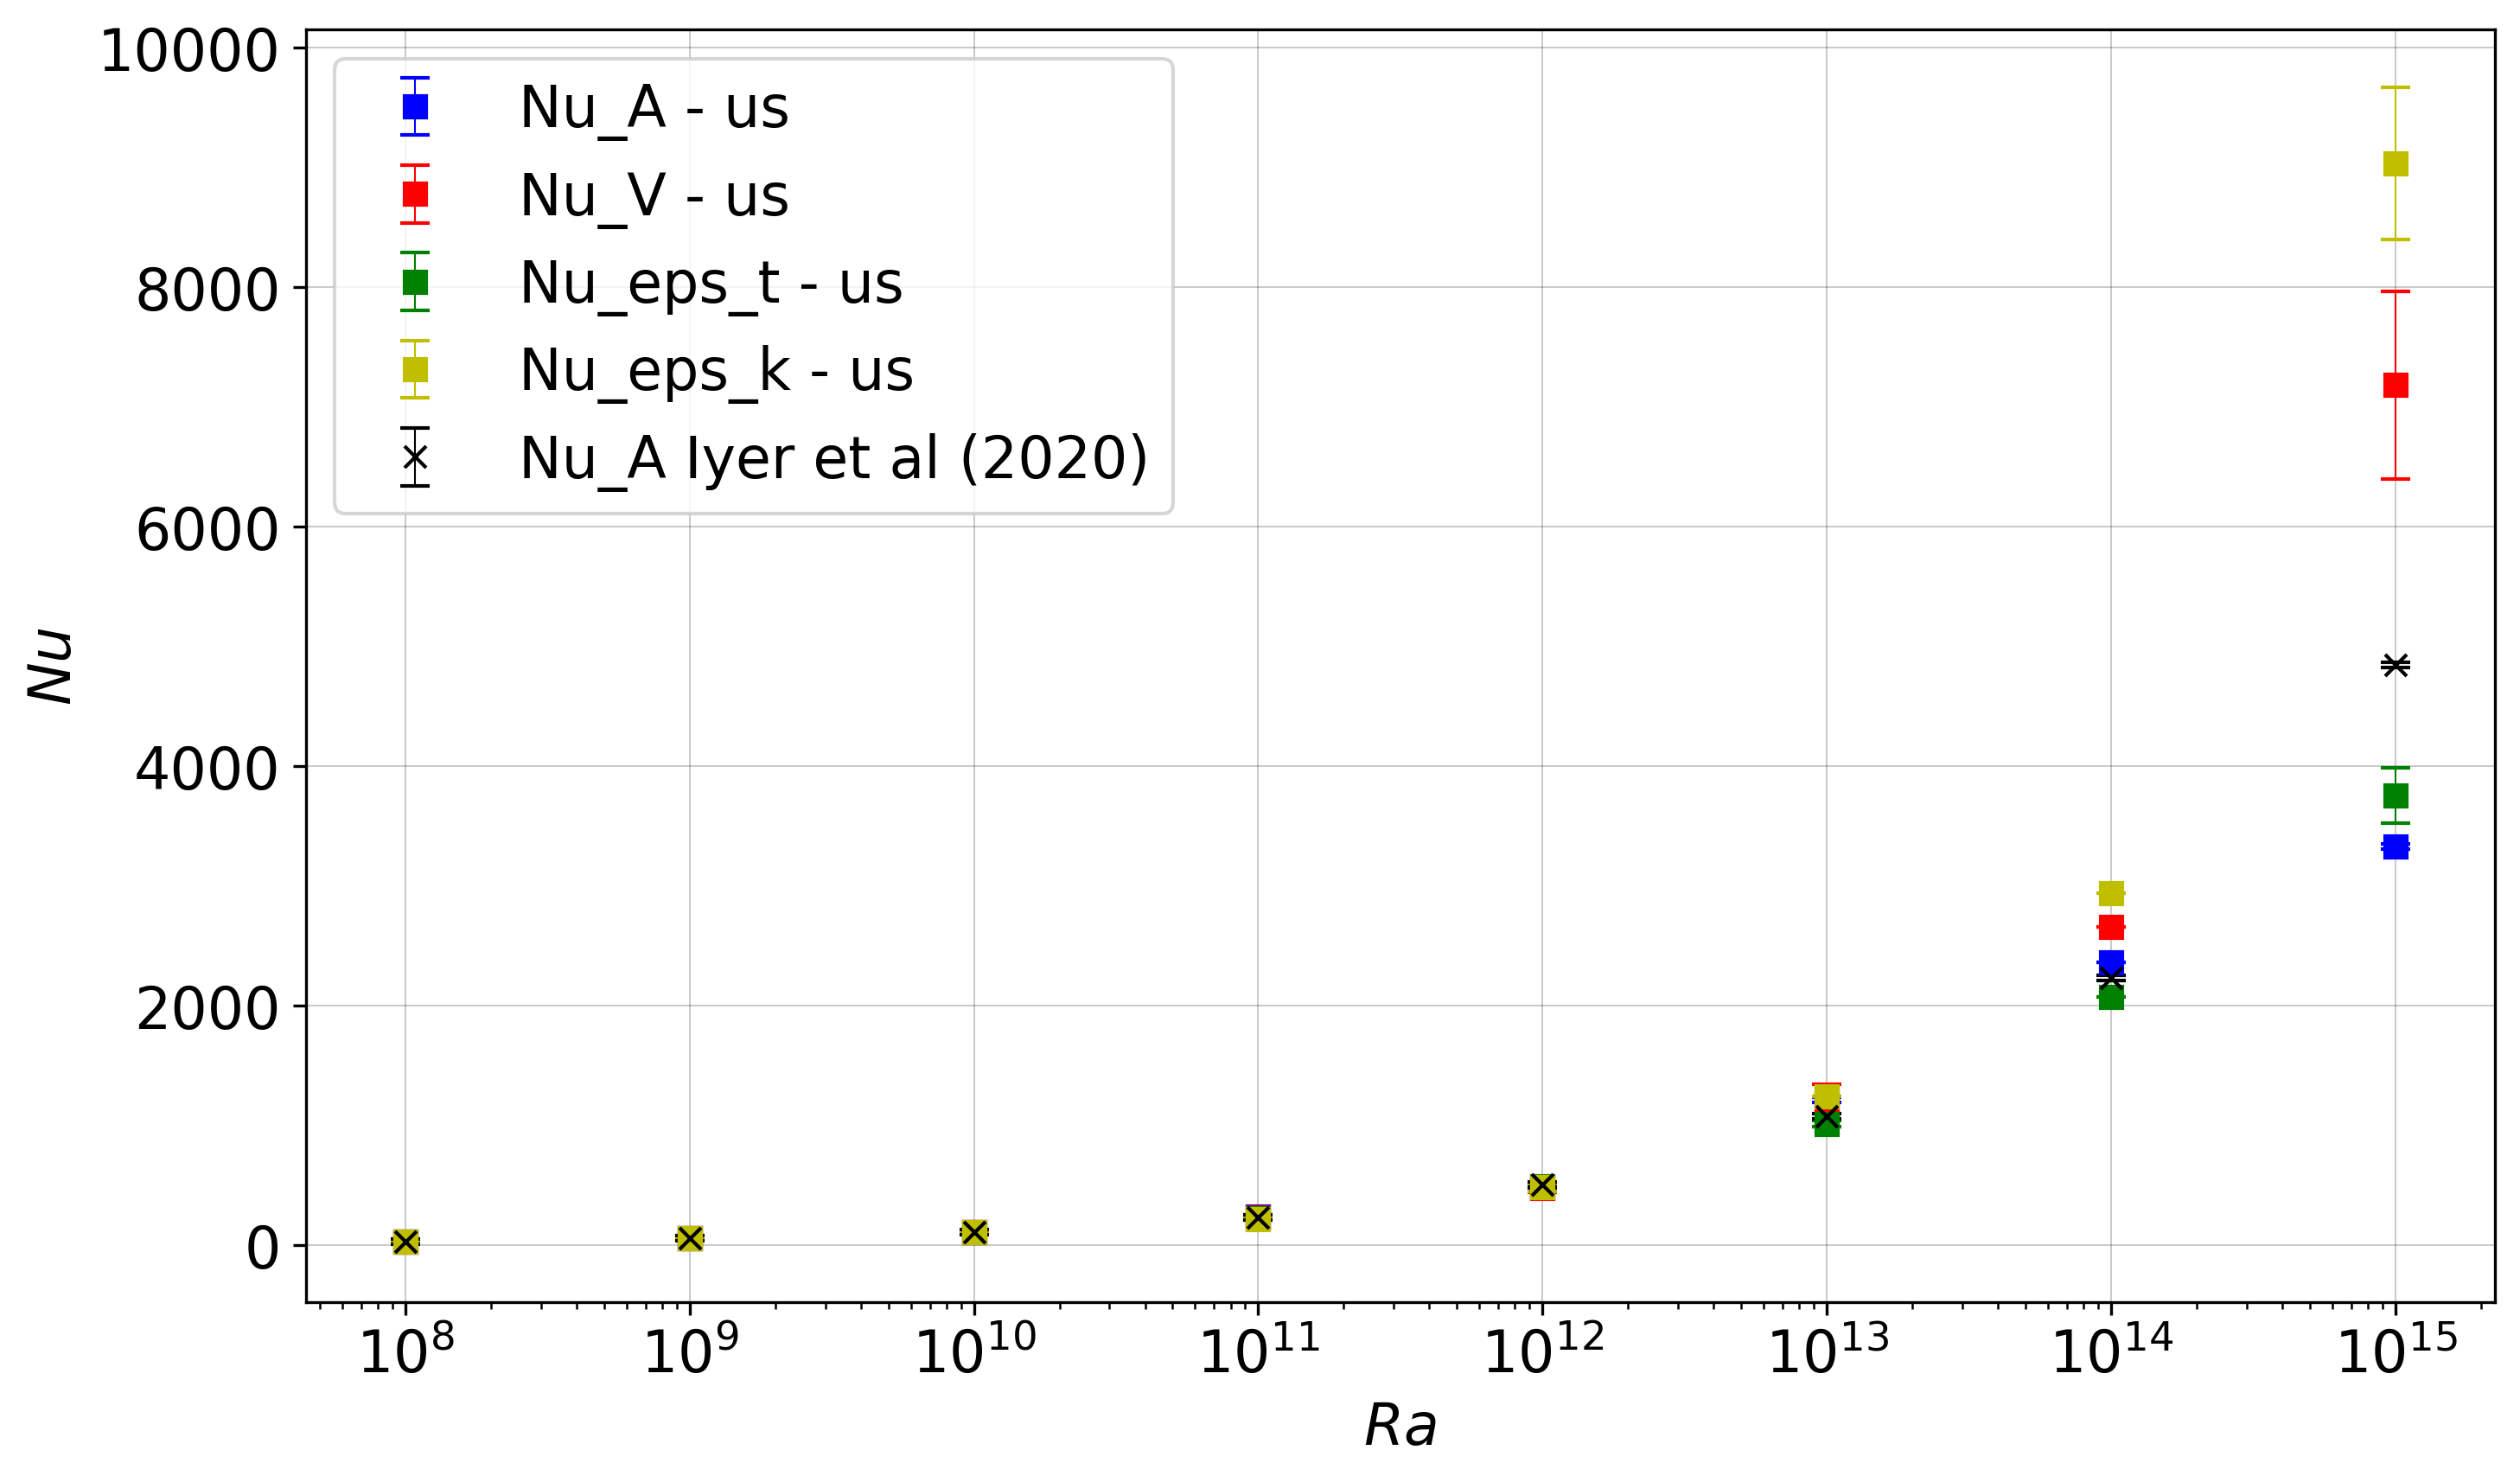

In [15]:
rcParams["errorbar.capsize"] = 4

fig, ax = plt.subplots(1, 1,figsize=(10, 6), dpi=300)

lab = 0
for which_ra in check_these_rayleigh:
    for ts in [ts_dict[which_ra][0]]:
        if ts.stats_nu_a[0] > 10:
            if lab ==0:     
                ax.errorbar(ts.Ra[0], ts.stats_nu_a[0], yerr=ts.stats_nu_a[2], fmt = 's', color = 'b', label = "Nu_A - us")
                
                ax.errorbar(ts.Ra[0], ts.stats_nu_v[0], yerr=ts.stats_nu_v[2], fmt = 's', color = 'r', label = "Nu_V - us")

                ax.errorbar(ts.Ra[0], ts.stats_nu_eps_t[0], yerr=ts.stats_nu_eps_t[2], fmt = 's', color = 'g', label = "Nu_eps_t - us")
                
                ax.errorbar(ts.Ra[0], ts.stats_nu_eps_k[0], yerr=ts.stats_nu_eps_k[2], fmt = 's', color = 'y', label = "Nu_eps_k - us")

            else:
                ax.errorbar(ts.Ra[0], ts.stats_nu_a[0], yerr=ts.stats_nu_a[2], fmt = 's', color = 'b')
                ax.errorbar(ts.Ra[0], ts.stats_nu_v[0], yerr=ts.stats_nu_v[2], fmt = 's', color = 'r')
                ax.errorbar(ts.Ra[0], ts.stats_nu_eps_t[0], yerr=ts.stats_nu_eps_t[2], fmt = 's', color = 'g')
                ax.errorbar(ts.Ra[0], ts.stats_nu_eps_k[0], yerr=ts.stats_nu_eps_k[2], fmt = 's', color = 'y')


            lab +=1

#Plot data by jorg
ra_j = [1e8,1e9,1e10,1e11, 1e12, 1e13, 1e14, 1e15]
nu_j = [29.94,58,107,229, 503, 1075, 2228, 4845]
nu_e_j = [0.04, 10, 11, 13, 25, 44, 100, 200]
ax.errorbar(ra_j, nu_j, yerr=ts.stats_nu_a[2], fmt = 'x', color = 'k' , label = "Nu_A Iyer et al (2020)")

# Plot scaling line
ra_x=np.linspace(1e8,1e15, 1000)
nu_x=0.0525*ra_x**(0.331)

#ax.plot(ra_x,nu_x, "--k", label="Nu=0.0523 x Ra^0.331")

ax.set_xlabel(r'$Ra$')
ax.set_ylabel(r'$Nu$')

#ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(color = 'black', linestyle = '-', linewidth = 0.1)
plt.tight_layout()
plt.legend()
#plt.savefig("nu_timeseries.pdf", format="pdf", bbox_inches="tight")
plt.show()